# Analisis Pengguna Asuransi - Final Project Probability Course Pacmann

# Intro

Diberikan data berupa insurance.csv yang berisi kolom:
1. Age (usia pengguna)
2. Sex (gender pengguna)
3. BMI (BMI pengguna)
4. Children (jumlah anak pengguna dalam tanggungan asuransi)
5. Smoker (kondisi merokok pengguna)
6. Region (region pengguna)
7. Charges (biaya pengguna)


dengan jumlah 1,338 baris.

Dari data tersebut, akan dapat terlihat korelasi antar variabel (kolom) yang satu dengan lainnya, sehingga bisa diketahui variabel apa yang menyebabkan tagihan pengguna menjadi lebih besar dari lainnya.

In [1]:
# Import library dan pembacaan file csv

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Sebelum melakukan analisis lebih lanjut, _dataset_ akan dilihat terlebih dahulu untuk memastikan tidak ada nilai yang kosong.

In [2]:
# Display informasi tiap kolom dari datasaet

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Dataset yang ada terlihat bersih dan tidak ada nilai yang kosong, sehingga bisa langsung dilakukan analisis.

Selanjutnya, dilakukan pratinjau sebagai berikut.

# Sebaran Data

## Numerik (int64 dan float64)

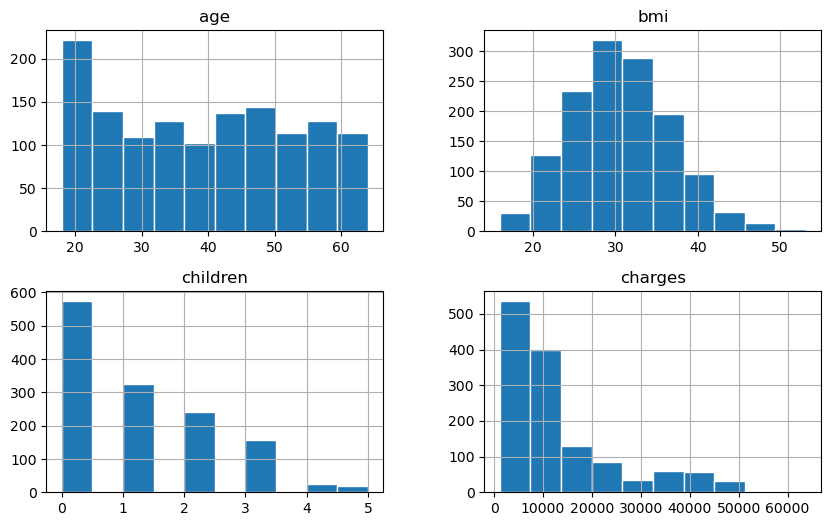

In [3]:
# Plot kolom numerik dari dataset

(df[['age','bmi','children','charges']].
 hist(figsize = (10, 6), bins=10, edgecolor='w', linewidth='1'))
plt.show()

Grafik di atas memberikan gambaran sebaran nilai untuk *age* di mana pengguna yang **berusia 20an tahun memuncaki nilai sebanyak lebih dari 200 pengguna.** **BMI pengguna paling banyak berada di rentang 28-30**. Pengguna yang tidak memilik anak mempunyai jumlah paling banyak dibandingkan dengan pengguna yang memiliki anak, baik itu satu, dua, tiga, empat, atau lima. Untuk besaran biaya pengguna, biaya yang berada di bawah 10,000 terkonsentrasi secara mencolok.

## Kategorik (Object)

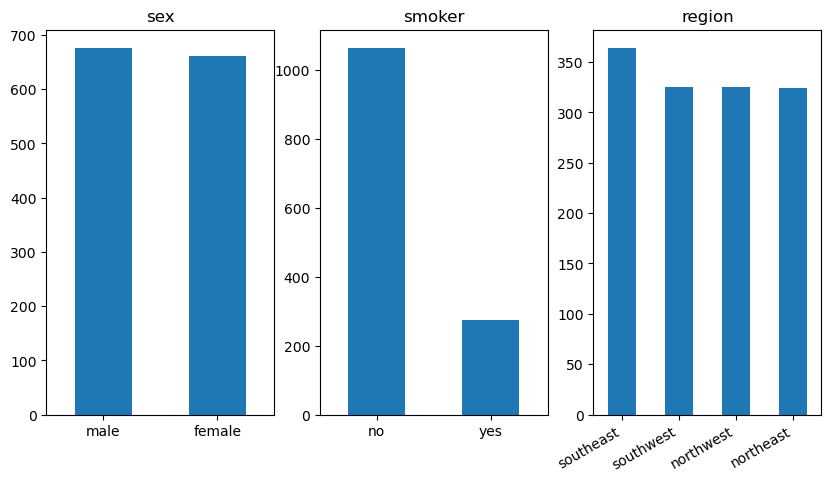

In [4]:
# Plot kolom kategorik dari dataset

categorical_features = ['sex', 'smoker', 'region']
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(df[categorical_features]):
    df[categorical_feature].value_counts().plot(kind='bar',rot=0, 
                                    figsize = (10, 5), ax=ax[i]).set_title(categorical_feature)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

Dari grafik diketahui bahwa rasio gender pengguna **relatif sama antara laki-laki dan perempuan.** Untuk k**ondisi merokok, ada ketimpangan yang sangat mencolok antara jumlah perokok dan non perokok**. Sedangkan untuk region, hanya southwest yang mempunyai pengguna di atas 350 orang.

# Analisis Deskriptif

In [5]:
# Display analisis deskriptif dari kolom numerik

df_desc = df.describe()
df_desc

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


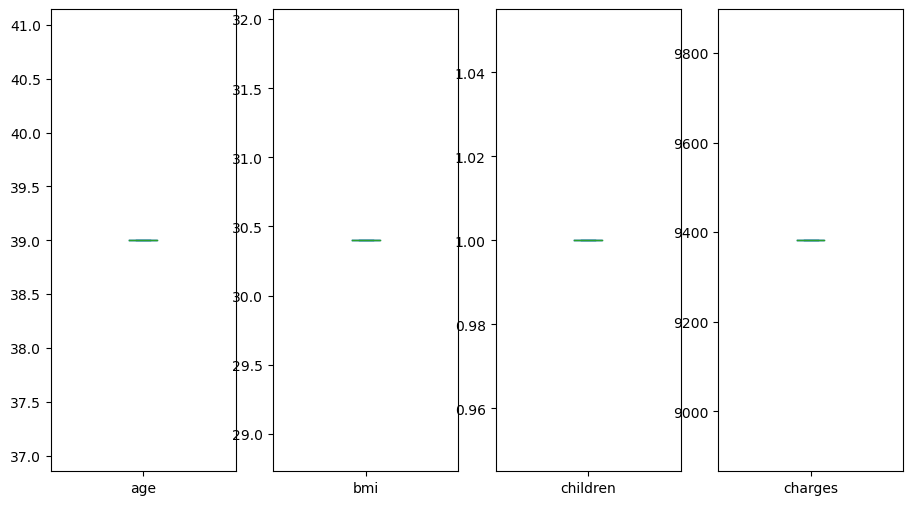

In [6]:
df_desc[df_desc.index=='50%'].plot(kind='box', subplots=True, rot=0, figsize=(11,6), legend=False)
plt.show()

Tabel di atas menunjukkan deskriptif statistik dari age, bmi, children, dan charge. Dapat dilihat bahwa **median pengguna asuransi berada di usia 39 tahun**, **median BMI berada pada 30.4, median jumlah anak yang dimiliki pengguna adalah 1, dan median biaya pengguna adalah $9382.**

## Hubungan antar variabel

Telah menjadi pemahaman umum bahwa biaya asuransi dipengaruhi oleh banyak faktor, seperti: kondisi merokok, jenis kelamin, usia, BMI, dan sebagainya. Pertanyaannya, apakah benar paradigma tersebut mempengaruhi biaya asuransi. Untuk menjawabnya, diperlihatkan pada sesi berikut.

### Biaya berdasarkan usia

In [7]:
# Kategorikan usia kemudian display deskriptif statistik dari masing-masing kategori tersebut

bins= [0,20,40,60,100] # first index is excluded, last index is included
labels = [
         '~20',
         '20-40',
         '40-60',
         '60~'
        ]
df['age_class']= pd.cut(
   df['age'], 
   bins = bins, 
   labels = labels,
   include_lowest = False
   )

charges_by_age = (df.groupby('age_class')
 [['charges']]
 .agg([len, min, max, 'mean', 'median'])
)
print(charges_by_age)

          charges                                                     
              len         min          max          mean        median
age_class                                                             
~20           166   1121.8739  39722.74620   8713.482413   2202.284475
20-40         535   1515.3449  58571.07448  10686.686643   5312.169850
40-60         546   5699.8375  63770.42801  15888.757668  11071.855500
60~            91  12557.6053  49577.66240  21063.163398  14394.557900


Dari data di atas, dapat diambil kesimpulan sementara bahwa **semakin tua usia pengguna, semakin besar biaya yang harus dikeluarkan untuk asuransi**. Gambaran umum perbandingan nilainya ditampilkan pada grafik berikut.

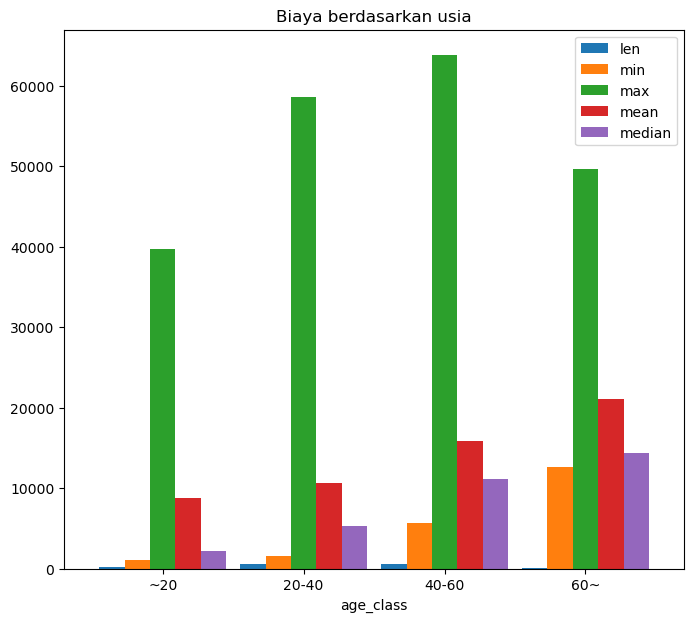

In [8]:
# Plot grafik dari biaya berdasarkan usia

charges_by_age['charges'].plot(kind='bar', figsize=(8,7), width=0.9, rot=0, title='Biaya berdasarkan usia')
plt.show()

Selain nilai biaya maksimal, dapat dilihat bahwa **semakin bertambahnya usia, semakin bertambah pula nilai minimal, mean, dan median biayanya**. Perlu investigasi lebih lanjut dan mendalam mengapa nilai maksimal justru berada pada rentang usia 40 sampai 60 tahun. 

### Biaya berdasarkan gender

In [9]:
# Membagi data berdasarkan gender: pria dan wanita, kemudian display nilai desktriptif statistiknya

charges_by_sex = df.groupby('sex')[['charges']].agg([len, min, max, 'mean', 'median'])
print(charges_by_sex)

       charges                                                  
           len        min          max          mean      median
sex                                                             
female     662  1607.5101  63770.42801  12569.578844  9412.96250
male       676  1121.8739  62592.87309  13956.751178  9369.61575


Tabel di atas menunjukkan bahwa dari total 1338 pengguna, **distirbusi pria lebih banyak 14 pengguna daripada wanita**. Sedangkan untuk rata-rata biaya berdasarkan gender, pengguna **pria membayar 1.11 kali lebih mahal daripada wanita**.

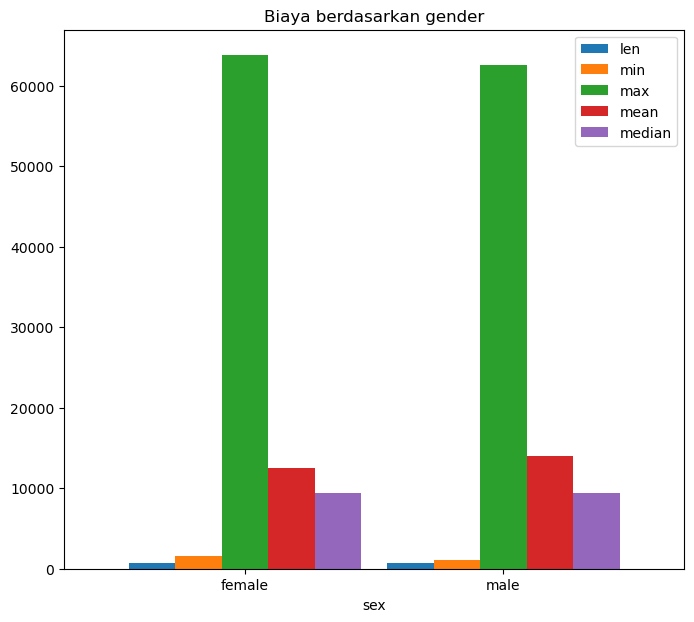

In [10]:
# Plot grafik dari biaya berdasarkan gender

charges_by_sex['charges'].plot(kind='bar', figsize=(8,7), width=0.9, rot=0, title='Biaya berdasarkan gender')
plt.show()

Pada grafik ditunjukkan nilai min dan max dari masing-masing pengguna tidak terlihat signifikan perbedaanya.

### Biaya berdasarkan BMI

Berdasarkan situs https://www.cdc.gov/obesity/basics/adult-defining.html, BMI bisa dikelompokkan menjadi:
* Kurang dari 18.5 : underweight
* 18.5 sampai kurang dari 25.0 : healthy
* 25.0 sampai kurang dari 30 : overweight
* Di atas 30 : obesity

Sehingga, _dataset_ yang ada BMI dikelompokkan sebagaimana disebutkan.

In [11]:
# Kategorikan bmi kemudian display deskriptif statistik dari masing-masing kategori tersebut

bins= [0,18.5,25.0,30,100]
labels = [
         'underweight',
         'healthy',
         'overweight',
         'obesity'
         ]

df['bmi_class']= pd.cut(
   df['bmi'], 
   bins = bins, 
   labels = labels,
   include_lowest = False
   )

charges_by_bmi = (df.groupby('bmi_class')
 [['charges']]
 .agg([len, min, max, 'mean', 'median'])
)
print(charges_by_bmi)

            charges                                                   
                len        min          max          mean       median
bmi_class                                                             
underweight      21  1621.3402  32734.18630   8657.620652  6640.544850
healthy         226  1121.8739  35069.37452  10435.440719  8604.153525
overweight      386  1252.4070  38245.59327  10997.803881  8659.378000
obesity         705  1131.5066  63770.42801  15560.926321  9964.060000


Dari tabel bisa dikatakan bahwa **semakin tinggi nilai BMI, semakin tinggi pula rata-rata biaya** yang harus dibayar pengguna asuransi. Untuk visualisasi antar-kategori, diberikan grafik berikut.

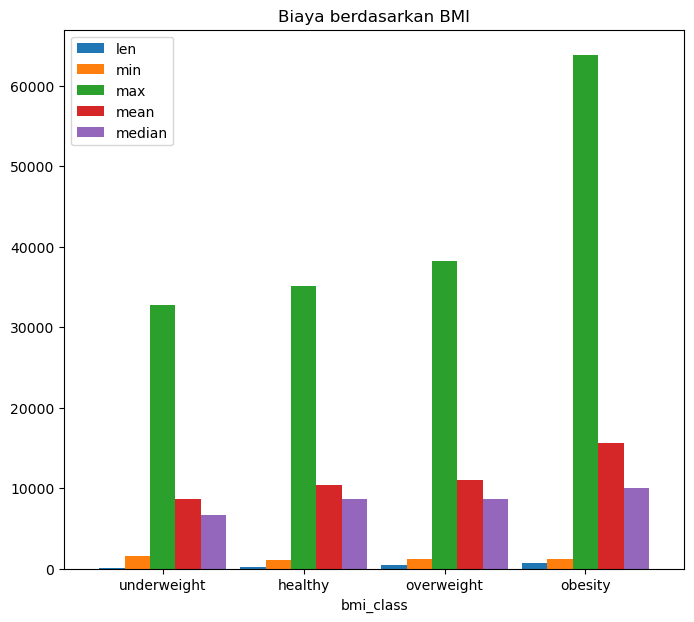

In [12]:
# Plot grafik dari biaya berdasarkan bmi

charges_by_bmi['charges'].plot(kind='bar', figsize=(8,7), width=0.9, rot=0, title = 'Biaya berdasarkan BMI')
plt.show()

Pada **nilai biaya minimal**, pengguna yang masuk kategori **_underweight_ justru membayar biaya lebih tinggi (sekitar $500) daripada pengguna kategori lain**, di mana hal ini perlu investigasi lebih lanjut. Pada nilai **mean dan median**, **semakin besar nilai BMI semakin besar pula tagihannya**. Peningkatan secara signifikan terjadi pada nilai **biaya maksimal** pengguna dengan kategori **_obesity_ yang mempunyai nilai sekitar 60% lebih tinggi daripada pengguna lain**.

### Berdasarkan jumlah anak

In [13]:
# Membagi data berdasarkan jumlah anak: 0, 1, 2, 3, 4, dan 5, kemudian display nilai desktriptif statistiknya

charges_by_children = df.groupby('children')[['charges']].agg([len, min, max, 'mean', 'median'])
print(charges_by_children)

         charges                                                   
             len        min          max          mean       median
children                                                           
0            574  1121.8739  63770.42801  12365.975602   9856.95190
1            324  1711.0268  58571.07448  12731.171832   8483.87015
2            240  2304.0022  49577.66240  15073.563734   9264.97915
3            157  3443.0640  60021.39897  15355.318367  10600.54830
4             25  4504.6624  40182.24600  13850.656311  11033.66170
5             18  4687.7970  19023.26000   8786.035247   8589.56505


Tabel menunjukkan bahwa **penambahan jumlah anak tidak linier dengan biaya pengguna**, dibuktikan dengan **rata-rata biaya yang fluktuatif terhadap jumlah anak**.

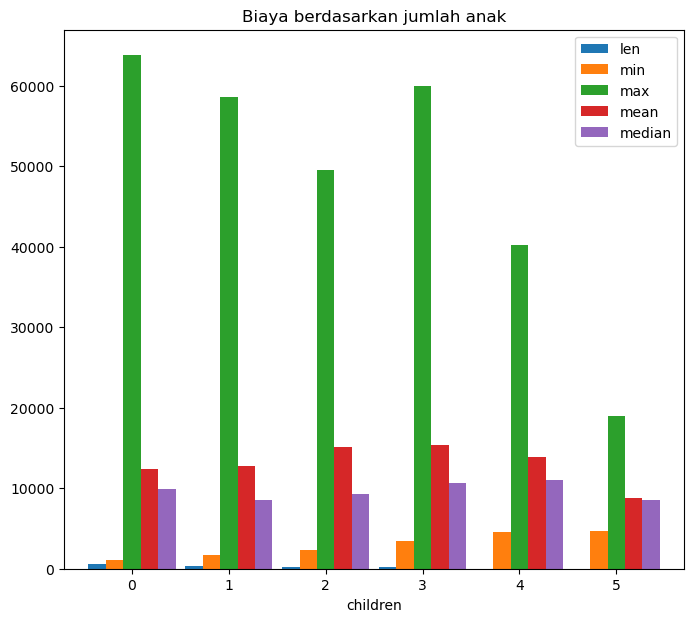

In [14]:
# Plot grafik dari biaya berdasarkan jumlah anak

charges_by_children['charges'].plot(kind='bar', figsize=(8,7), width=0.9, rot=0, 
                                    title='Biaya berdasarkan jumlah anak')
plt.show()

Hal menarik yang bisa dilihat dari grafik di atas adalah:
1. Biaya minimal pengguna naik berdasarkan jumlah anak: ini sangat masuk akal karena semakin banyak jumlah anak, semakin banyak orang yang harus dilindungi asuransi. 
2. Biaya maksimal pengguna cenderung turun berdasarkan jumlah anak, kecuali pada jumlah anak 3: perlu dilakukan investigasi lebih lanjut dan mendalam mengapa hal ini bisa terjadi.
3. Biaya rata-rata pengguna turun pada jumlah anak 5, yang sangat bertolak belakang dengan poin nomor 1. Lagi-lagi diperlukan analisis mendalam tentang hal ini.

### Biaya berdasarkan kondisi merokok

In [15]:
# Membagi data berdasarkan kondisi merokok: smoker dan non smoker, 
# kemudian display nilai desktriptif statistiknya

charges_by_smoker = df.groupby('smoker')[['charges']].agg([len, min, max, 'mean', 'median'])
print(charges_by_smoker)

       charges                                                    
           len         min          max          mean       median
smoker                                                            
no        1064   1121.8739  36910.60803   8434.268298   7345.40530
yes        274  12829.4551  63770.42801  32050.231832  34456.34845


Tabel di atas menunjukkan perbedaan yang signifikan antara **rata-rata biaya perokok dan non perokok**, di mana **perokok membayar hampir 4 kali biaya dari pengguna non perokok**.

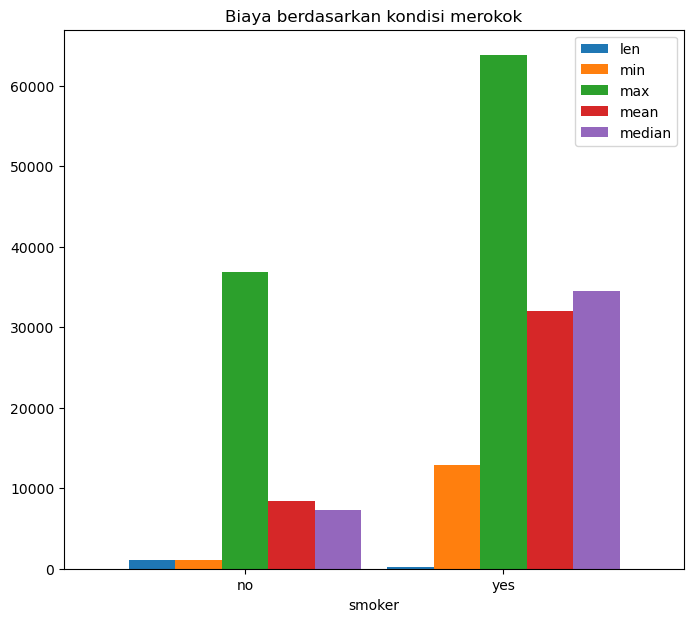

In [16]:
# Plot grafik dari biaya berdasarkan gender

charges_by_smoker['charges'].plot(kind='bar', figsize=(8,7), width=0.9, rot=0, 
                                  title='Biaya berdasarkan kondisi merokok')
plt.show()

Diberikan grafik yang menggambarkan perbedaan biaya perokok dan non perokok. Semua nilai: **minimal biaya, maksimal biaya, mean, dan median perokok selalu lebih besar daripada non perokok**.

### Biaya berdasarkan region

In [17]:
# Membagi data berdasarkan region: southwest, southeast, northwest, dan northeast, 
# kemudian display nilai desktriptif statistiknya

charges_by_region = df.groupby('region')[['charges']].agg([len, min, max, 'mean', 'median'])
print(charges_by_region)

          charges                                                    
              len        min          max          mean        median
region                                                               
northeast     324  1694.7964  58571.07448  13406.384516  10057.652025
northwest     325  1621.3402  60021.39897  12417.575374   8965.795750
southeast     364  1121.8739  63770.42801  14735.411438   9294.131950
southwest     325  1241.5650  52590.82939  12346.937377   8798.593000


Dari tabel dapat dikatakan bahwa **persebaran pengguna relatif sama di tiap region**. Untuk nilai **rata-rata dan maksimal biaya, region southeast lebih besar daripada region lainnya**. Lagi-lagi, perlu investigasi lebih lanjut mengapa hal ini bisa terjadi.

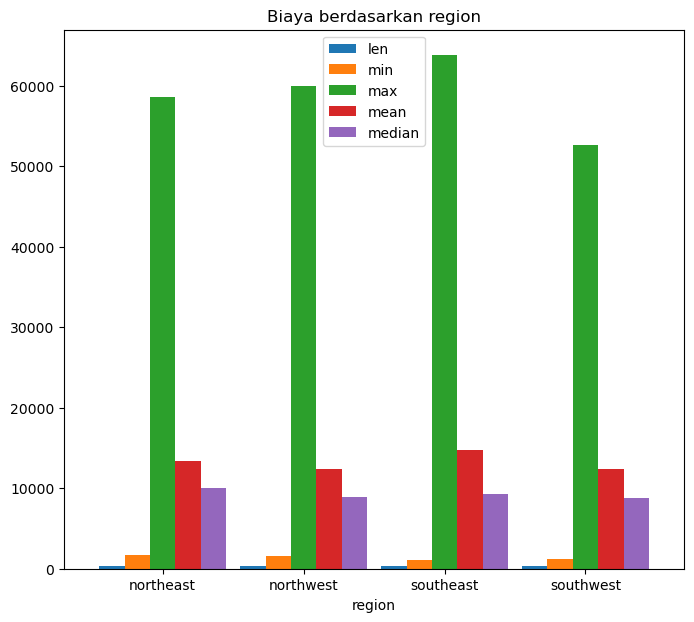

In [18]:
# Plot grafik dari biaya berdasarkan region

charges_by_region['charges'].plot(kind='bar', figsize=(8,7), width=0.9, rot=0,
                                 title='Biaya berdasarkan region')
plt.show()

Grafik di atas menunjukkan nilai mean dari tiap region cenderung tidak berpengaruh di mana pengguna itu tinggal.

> Dari hubungan antar-variabel dapat ditarik kesimpulan sementara bahwa besarnya biaya dipengaruhi oleh:
> 1. Umur: semakin berumur pengguna, biaya yang dikeluargan semakin besar
> 2. Gender: pria cenderung membayar 1.11 kali lebih mahal dibanding wanita.
> 3. BMI: pengguna dengan BMI di atas 30 (masuk kategori obesity) mempunyai biaya lebih mahal daripada daripada pengguna dengan BMI di bawah 30.
> 4. Kondisi merokok: pengguna perokok membayar rata-rata biaya 4 kali lebih mahal daripada pengguna non perokok.

# Korelasi antar variabel

Setelah melihat hubungan antara biaya berdasarkan tiap variabel lainnya, pada sesi berikut akan diberikan gambaran umum seberapa besar korelasi variabel-variabel tersebut terhadap biaya.

Sebelum melihat korelasi tiap variabel terhadap biaya, akan dilakukan penormalan variabel kategorik *sex, bmi, dan smoker* menjadi angka yang mewakili nilainya masing masing.

Untuk kategori sex, penormalan mengikuti kaidah berikut:
1. sex: female = 0
2. sex: male = 1

Untuk BMI, penormalan mengikuti kaidah berikut:
1. bmi >= 30 (obese) = 1
2. bmi < 30 (not obese) = 0

Untuk kolom smoker, penormalan mengikuti kaidah berikut:
1. smoker: yes = 1
2. smoker: no = 0

In [19]:
# Fungsi untuk penormalan gender

def map_gender(column):
    mapped = []
    for row in column:
        if row == 'female':
            mapped.append(0)
        else:
            mapped.append(1)
    return mapped

df['gender_norm'] = map_gender(df['sex'])

In [20]:
# Fungsi untuk penormlana BMI

def map_bmi(column):
    mapped = []
    for row in column:
        if row < 30: # BMI kurang dari 30 bukan termasuk obesity
            mapped.append(0)
        else:
            mapped.append(1)
    return mapped

df['bmi_norm'] = map_bmi(df['bmi'])

In [21]:
# Fungsi untuk penormalan smoker

def map_smoking(column):
    mapped = []
    for row in column:
        if row == 'yes':
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped

df['smoker_norm'] = map_smoking(df['smoker'])

In [22]:
dfcorr = df.corr().abs()
dfcorr

,age,bmi,children,charges,gender_norm,bmi_norm,smoker_norm
age,1.000000,0.109272,0.042469,0.299008,0.020856,0.085668,0.025019
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.799211,0.003750
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.009807,0.007673
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.199532,0.787251
gender_norm,0.020856,0.046371,0.017163,0.057292,1.000000,0.047317,0.076185
bmi_norm,0.085668,0.799211,0.009807,0.199532,0.047317,1.000000,0.000810
smoker_norm,0.025019,0.003750,0.007673,0.787251,0.076185,0.000810,1.000000


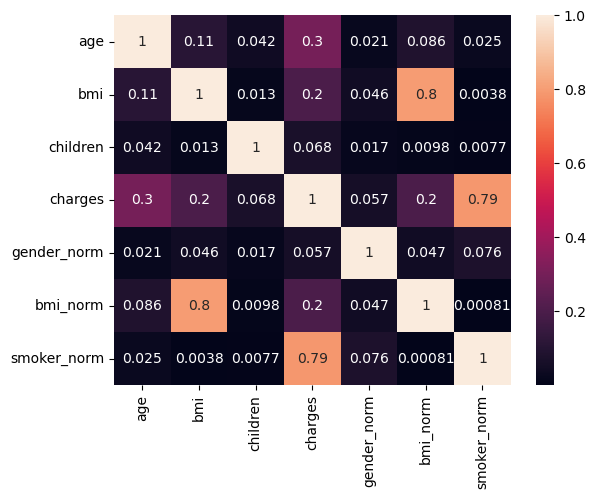

In [23]:
corrheat = sns.heatmap(dfcorr, annot= True)

Heat map di atas memperlihatkan bahwa:
1. Age berkorelasi 0.3 terhadap charges, yang berarti semakin tua usia pengguna biaya bisa menjadi lebih mahal.
2. BMI berkorelasi 0.2 terhadap charges, yang berarti semakin tinggi bmi biaya bisa menjadi lebih mahal.
3. Children berkolerasi 0.068 terhadap charges, menandakan jumlah anak sangat sedikit pengaruhnya terhadap biaya.
4. Sex berkorelasi 0.057 terhadap charges, menandakan tidak ada perbedaan signifikan pria atau wanita terhadap biaya.
5. BMI norm (obesity) berkorelasi 0.2 terhadap charges, yang berarti jika pengguna tersebut termasuk obesitas biaya asuransi akan cenderung lebih tinggi daripada pengguna non obesitas.
6. Smoker norm berkolerasi 0.79 terhdapa biaya, yang berarti bila pengguna merupakan perokok, biaya yang harus dibayarkan lebih mahal daripada pengguna non merokok.

### Nilai rata-rata variabel berdasarkan variabel

#### Usia perokok berdasarkan gender

In [24]:
# Kelompokkan data berdasarkan smoker-non smoker, male-female, kemudian dicari rata-rata usianya

smoker_by_sex_age_mean = df.groupby(['smoker', 'sex']).age.mean()
smoker_by_sex_age_mean

smoker  sex   
no      female    39.691042
        male      39.061896
yes     female    38.608696
        male      38.446541
Name: age, dtype: float64

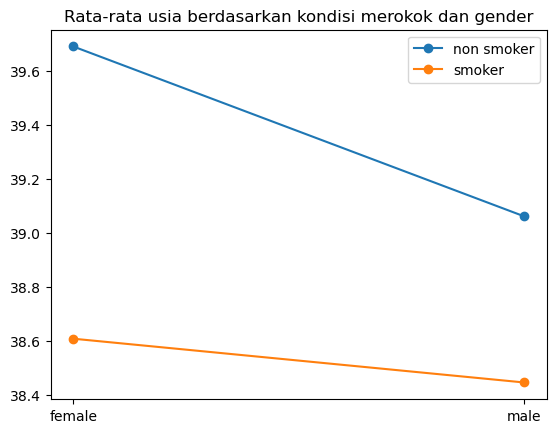

In [25]:
# Plot grafik berdasarkan tabel untuk memudahkan visualisasi

fig, ax = plt.subplots()
ax.plot(smoker_by_sex_age_mean['no'], label='non smoker', marker='o')
ax.plot(smoker_by_sex_age_mean['yes'], label='smoker', marker='o')
ax.legend()
plt.xticks(rotation=0, horizontalalignment="center")
plt.title('Rata-rata usia berdasarkan kondisi merokok dan gender')
plt.show()

Grafik di atas menunjukkan bahwa **rata-rata usia wanita selalu lebih tinggi daripada usia pria, baik itu perokok maupun non perokok**, di mana wanita perokok rata-rata berusia 38.6 tahun, dan wanita non perokok rata-rata berusia 39.6 tahun.

#### BMI perokok berdasarkan gender

In [26]:
# Kelompokkan data berdasarkan smoker-non smoker, male-female, kemudian dicari rata-rata BMI-nya

smoker_by_sex_bmi_mean = df.groupby(['smoker', 'sex']).bmi.mean()
smoker_by_sex_bmi_mean

smoker  sex   
no      female    30.539525
        male      30.770580
yes     female    29.608261
        male      31.504182
Name: bmi, dtype: float64

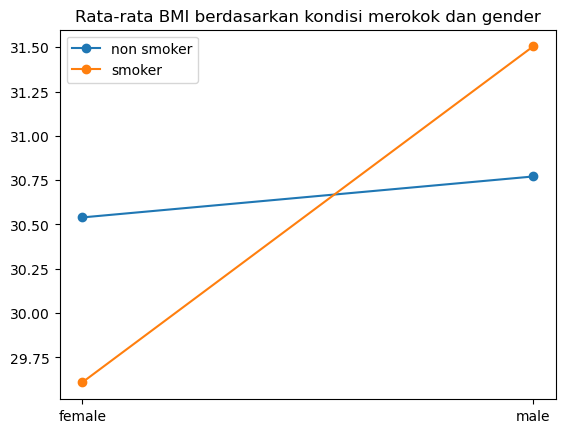

In [27]:
# Plot grafik berdasarkan tabel untuk memudahkan visualisasi

fig, ax = plt.subplots()
ax.plot(smoker_by_sex_bmi_mean['no'], label='non smoker', marker='o')
ax.plot(smoker_by_sex_bmi_mean['yes'], label='smoker', marker='o')
ax.legend()
plt.xticks(rotation=0, horizontalalignment="center")
plt.title('Rata-rata BMI berdasarkan kondisi merokok dan gender')
plt.show()

Grafik di atas menunjukkan **rata-rata BMI pria perokok lebih tinggi daripada BMI wanita perokok**. Sedangkan untuk **pengguna non perokok, wanita dan pria mempunyai BMI yang tidak berbeda jauh**.

#### Biaya perokok berdasarkan gender

In [28]:
# Kelompokkan data berdasarkan smoker-non smoker, male-female, kemudian dicari rata-rata biayanya

smoker_by_sex_charges_mean = df.groupby(['smoker', 'sex']).charges.mean()
smoker_by_sex_charges_mean

smoker  sex   
no      female     8762.297300
        male       8087.204731
yes     female    30678.996276
        male      33042.005975
Name: charges, dtype: float64

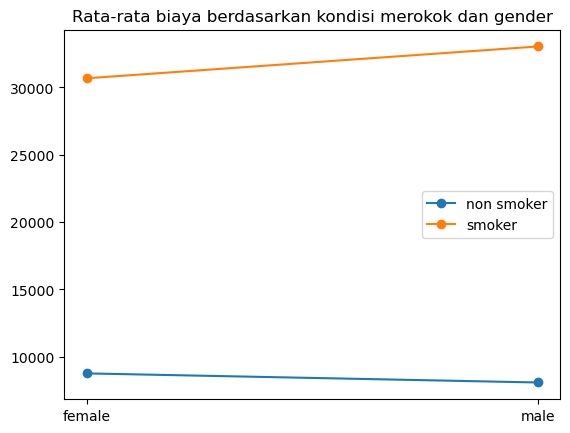

In [29]:
# Plot grafik berdasarkan tabel untuk memudahkan visualisasi

fig, ax = plt.subplots()
ax.plot(smoker_by_sex_charges_mean['no'], label='non smoker', marker='o')
ax.plot(smoker_by_sex_charges_mean['yes'], label='smoker', marker='o')
ax.legend()
plt.xticks(rotation=0, horizontalalignment="center")
plt.title('Rata-rata biaya berdasarkan kondisi merokok dan gender')
plt.show()

Grafik di atas menunujukkan **perbedaan rata-rata biaya yang sangat jauh antara perokok dan non perokok baik itu pria maupun wanita**. **Pria perokok mempunyai biaya tagihan 3000USD lebih besar daripada perokok wanita**. Sedangkan pengguna non perokok, justru **pria non perokok mempunyai tagihan yang sedikit lebih rendah 600USD daripada wanita non perokok**.

# Analisis Peluang Fitur

## Proporsi fitur pada tiap region

Setelah mengetahui gambaran umum dari *dataset*, sesi ini memberikan proporsi fitur-fitur dari masing-masing region sehingga mendapatkan informasi yang jelas apakah tiap region mempunyai pengguna asuransi yang sama atau berbeda karakteristiknya.

In [30]:
# Kategorikan charges menjadi fitur continue

bins= [0,5000,15000,30000,100000] # first index is excluded, last index is included
labels = [
         'under5k',
         '5k-15k',
         '15k-30k',
         'above30k'
         ]

df['charges_class']= pd.cut(
   df['charges'], 
   bins = bins, 
   labels = labels,
   include_lowest = False
   )


In [31]:
# Bagi dataset berdasarkan region dan disimpan dalam variabel sesuai dengan dengan namanya

dfsw = df.query("region == 'southwest'")
dfse = df.query("region == 'southeast'")
dfnw = df.query("region == 'northwest'")
dfne = df.query("region == 'northeast'")

### Sebaran data tiap region

In [32]:
# Display sebaran kelas usia pada tiap-tiap region

sw_ageclass = dfsw.value_counts(['age_class'], normalize=True)
se_ageclass = dfse.value_counts(['age_class'], normalize=True)
nw_ageclass = dfnw.value_counts(['age_class'], normalize=True)
ne_ageclass = dfne.value_counts(['age_class'], normalize=True)

ageclass_given_regions = pd.DataFrame([sw_ageclass,se_ageclass,nw_ageclass,ne_ageclass],
                                    index=['southwest', 'southeast', 'northwest', 'northeast'])
ageclass_given_regions

age_class,40-60,20-40,~20,60~
southwest,0.415385,0.396923,0.120000,0.067692
southeast,0.403846,0.395604,0.131868,0.068681
northwest,0.400000,0.403077,0.126154,0.070769
northeast,0.413580,0.404321,0.117284,0.064815


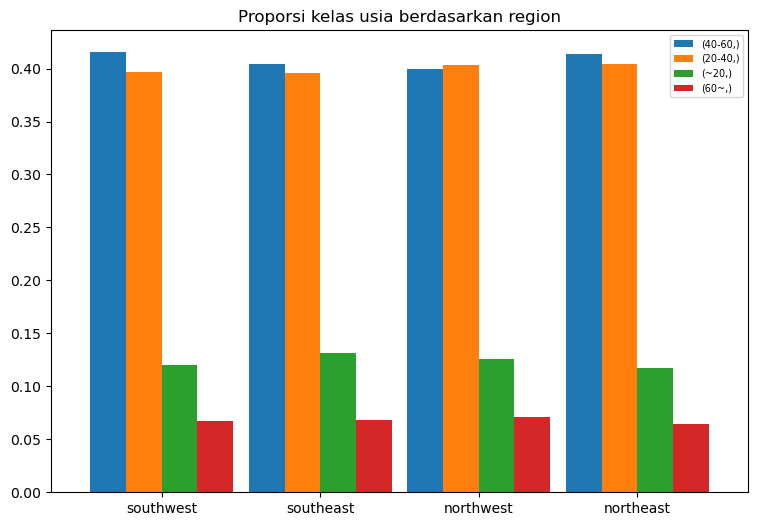

In [33]:
ageclass_given_regions.plot(kind='bar', rot=0, figsize=(9,6), width=0.9)
plt.legend(fontsize='x-small') 
plt.title('Proporsi kelas usia berdasarkan region')
plt.show()

Grafik di atas memperlihatkan proporsi kelas usia dari masing-masing region. **Pada kelas usia 40-60 tahun, tiap-tiap region mempunyai proporsi yang hamir sama di kisaran 0.4**. berada di urutan kedua, pengguna kelas usia 20-40 tahun pada tiap-tiap region mempunyai proporsi 0.39 untuk Southwest dan Southeast, sedangkan Northwest dan Northeast mempunyai proporsi 0.4. Kelas usia di bawah 20 tahun dan kelas usia di atas 60 tahun, mempunyanyai proporsi yang tidak begitu signifikan perbedaaanya pada tiap region. 

In [34]:
# Display sebaran gender pada tiap-tiap region

sw_sex = dfsw.value_counts(['sex'], normalize=True)
se_sex = dfse.value_counts(['sex'], normalize=True)
nw_sex = dfnw.value_counts(['sex'], normalize=True)
ne_sex = dfne.value_counts(['sex'], normalize=True)

sex_given_regions = pd.DataFrame([sw_sex,se_sex,nw_sex,ne_sex],
                                    index=['southwest', 'southeast', 'northwest', 'northeast'])
sex_given_regions

sex,male,female
southwest,0.501538,0.498462
southeast,0.519231,0.480769
northwest,0.495385,0.504615
northeast,0.503086,0.496914


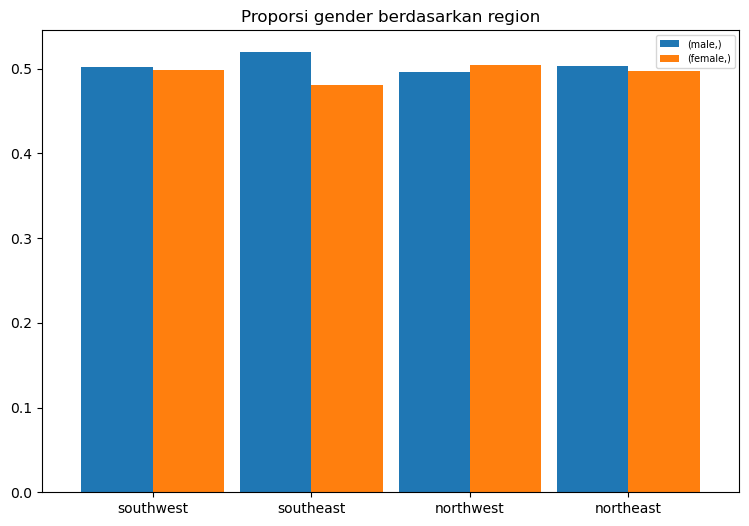

In [35]:
sex_given_regions.plot(kind='bar', rot=0, figsize=(9,6), width=0.9)
plt.legend(fontsize='x-small') 
plt.title('Proporsi gender berdasarkan region')
plt.show()

Untuk proporsi pria dan wanita pada tiap region, hanya **Southeast yang perbedaan pria dan wanitanya terlihat sedikit menonjol, yaitu 0.519 pria dan 0.480 wanita**. Ketiga region lain saling berbagi proporsi yang sama untuk gender. 

In [36]:
# Display sebaran kelas BMI pada tiap-tiap region

sw_bmi = dfsw.value_counts(['bmi_class'], normalize=True)
se_bmi = dfse.value_counts(['bmi_class'], normalize=True)
nw_bmi = dfnw.value_counts(['bmi_class'], normalize=True)
ne_bmi = dfne.value_counts(['bmi_class'], normalize=True)

bmi_given_regions = pd.DataFrame([sw_bmi,se_bmi,nw_bmi,ne_bmi],
                                    index=['southwest', 'southeast', 'northwest', 'northeast'])
bmi_given_regions

bmi_class,obesity,overweight,healthy,underweight
southwest,0.526154,0.310769,0.150769,0.012308
southeast,0.667582,0.219780,0.112637,0.000000
northwest,0.455385,0.329231,0.193846,0.021538
northeast,0.441358,0.302469,0.225309,0.030864


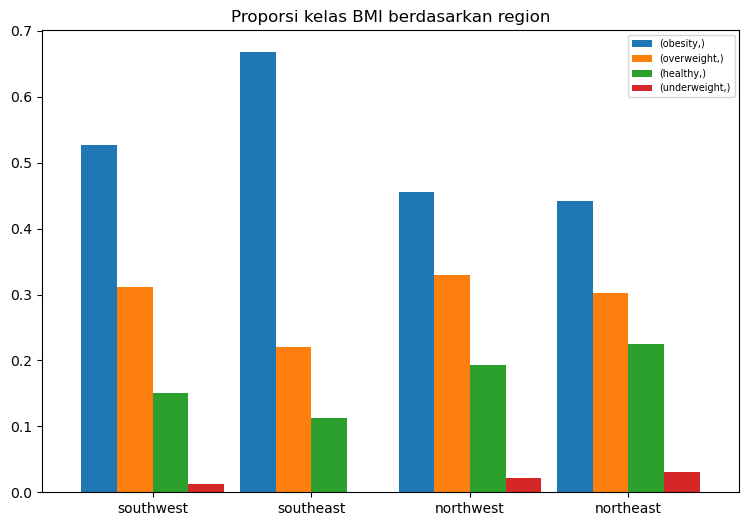

In [37]:
bmi_given_regions.plot(kind='bar', rot=0, figsize=(9,6), width=0.9)
plt.legend(fontsize='x-small') 
plt.title('Proporsi kelas BMI berdasarkan region')
plt.show()

Grafik di atas menunjukkan region Southeast mempunyai pengguna dengan kelas BMI **obesity terbanyak dibanding region lain, dengan proporsi 0.66**. berada di urutan kedua region Southwest dengan proporsi 0.52. **Region Southeast menjadi satu-satunya region yang tidak mempunyai pengguna dengan kelas BMI underweight**.

In [38]:
# Display sebaran jumlah anak pada tiap-tiap region

sw_children = dfsw.value_counts(['children'], normalize=True)
se_children = dfse.value_counts(['children'], normalize=True)
nw_children = dfnw.value_counts(['children'], normalize=True)
ne_children = dfne.value_counts(['children'], normalize=True)

children_given_regions = pd.DataFrame([sw_children,se_children,nw_children,ne_children],
                                    index=['southwest', 'southeast', 'northwest', 'northeast'])
children_given_regions

children,0,1,2,3,5,4
southwest,0.424615,0.240000,0.175385,0.113846,0.024615,0.021538
southeast,0.431319,0.260989,0.181319,0.096154,0.016484,0.013736
northwest,0.406154,0.227692,0.203077,0.141538,0.003077,0.018462
northeast,0.453704,0.237654,0.157407,0.120370,0.009259,0.021605


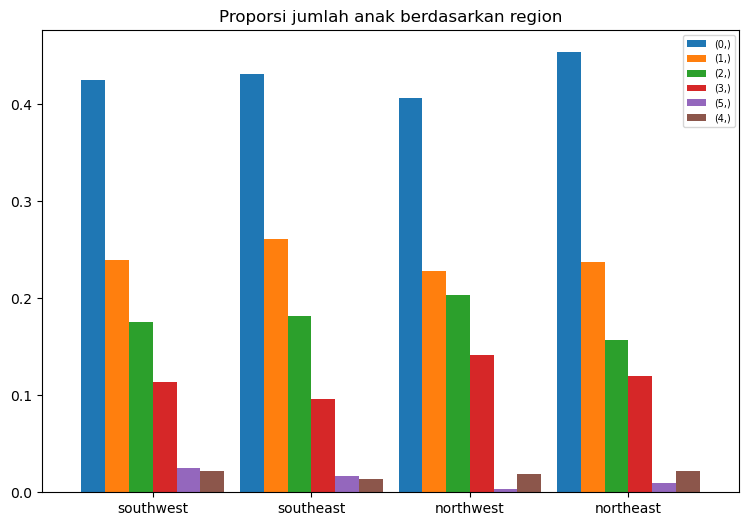

In [39]:
children_given_regions.plot(kind='bar', rot=0, figsize=(9,6), width=0.9)
plt.legend(fontsize='x-small') 
plt.title('Proporsi jumlah anak berdasarkan region')
plt.show()

Grafik di atas menunjukkan proporsi pengguna yang tidak mempunyai anak pada tiap region relatif sama kecuali Northeast yang mempunyai nilai 0.45. Tiap-tiap region juga memperlihatkan bahwa sebagian besar pengguna mempunyai proporsi yang tinggi memiliki jumlah anak di bawah 3. 

In [40]:
# Display sebaran kondisi merokok pada tiap-tiap region

sw_smoker = dfsw.value_counts(['smoker'], normalize=True)
se_smoker = dfse.value_counts(['smoker'], normalize=True)
nw_smoker = dfnw.value_counts(['smoker'], normalize=True)
ne_smoker = dfne.value_counts(['smoker'], normalize=True)

smoker_given_regions = pd.DataFrame([sw_smoker,se_smoker,nw_smoker,ne_smoker],
                                    index=['southwest', 'southeast', 'northwest', 'northeast'])
smoker_given_regions

smoker,no,yes
southwest,0.821538,0.178462
southeast,0.750000,0.250000
northwest,0.821538,0.178462
northeast,0.793210,0.206790


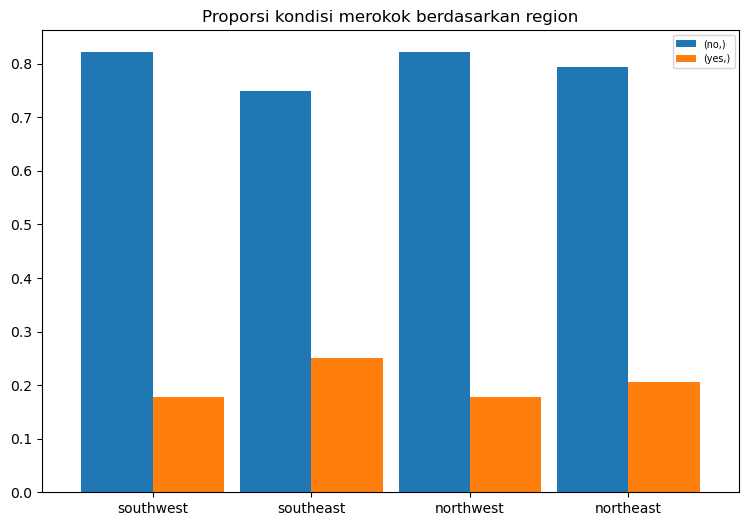

In [41]:
smoker_given_regions.plot(kind='bar', rot=0, figsize=(9,6), width=0.9)
plt.legend(fontsize='x-small') 
plt.title('Proporsi kondisi merokok berdasarkan region')
plt.show()

Untuk proporsi kondisi merokok tiap region, pengguna non perokok mempunyai proporsi yang paling besar pada keempat region, dengan nilai: Southwest 0.82, Southeast 0.75, Northwest 0.82, dan Northeast 0.79. Sedangkan proporsi perokok, region **Southeast mempunyai proporsi yang cukup besar dibandingkan ketiga region lain yaitu 0.25**. 

In [42]:
sw_charges = dfsw.value_counts(['charges_class'], normalize=True)
se_charges = dfse.value_counts(['charges_class'], normalize=True)
nw_charges = dfnw.value_counts(['charges_class'], normalize=True)
ne_charges = dfne.value_counts(['charges_class'], normalize=True)

charges_given_regions = pd.DataFrame([sw_charges,se_charges,nw_charges,ne_charges],
                                    index=['southwest', 'southeast', 'northwest', 'northeast'])
charges_given_regions


charges_class,5k-15k,under5k,above30k,15k-30k
southwest,0.507692,0.270769,0.113846,0.107692
southeast,0.392857,0.288462,0.167582,0.151099
northwest,0.483077,0.267692,0.089231,0.160000
northeast,0.481481,0.243827,0.108025,0.166667


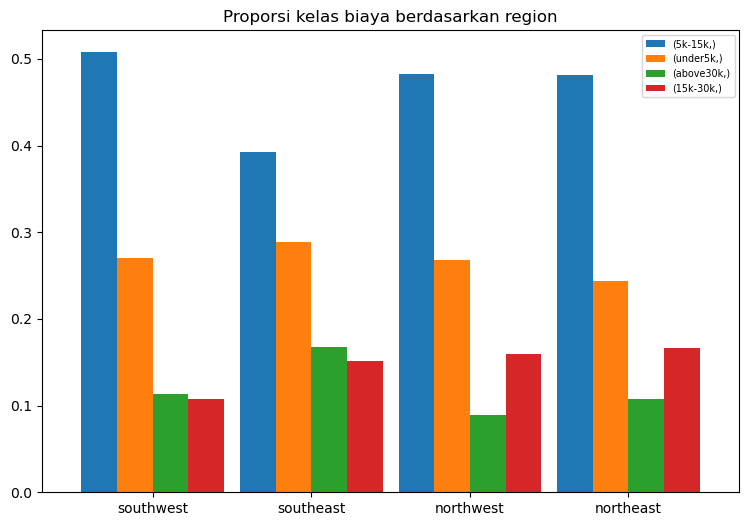

In [43]:
charges_given_regions.plot(kind='bar', rot=0, figsize=(9,6), width=0.9)
plt.legend(fontsize='x-small') 
plt.title('Proporsi kelas biaya berdasarkan region')
plt.show()

Grafik di atas menunjukkan **proporsi biaya $5,000 - $15,000 menduduki peringkat pertama pada tiap region**. Pada urutan kedua **kelas biaya di bawah $5,000 terdistribusi 0.2 pada keempat region**. Kelas biaya **$15,000 - $30,000 menduduki urutan ketiga di Northwest dan Northeast dengan nilai 0.16**. Pada region Southwest dan Southeast, **kelas biaya di atas $30,000 mempunyai proporsi yang lebih besar daripada kelas biaya gold.**

Untuk masing-masing region, dapat disimpulkan bahwa proporsi fitur-fitur pengguna asuransi tidak melenceng dari keseluruhan nilai rata-rata dataset yang telah dibahas di bagian pertama. 
1. Kelas usia 40-60 tahun mempunyai proporsi terbesar kecuali di Northwest, yang proporsi terbesarnya adalah kelas usia 20-40 tahun.
2. Gender pengguna relatif sama pada tiap region kecuali Southeast yang proporsinya 0.519 pria dan 0.480 wanita.
3. Pada keempat region, pengguna yang masuk kategori kelas BMI obesity mempunyai peluang terbesar, diikuti overweigt, healthy, dan underweight di urutan terakhir.
4. Pengguna yang tidak memiliki anak dan memiliki jumlah anak di bawah 3 mempunyai proporsi yang besar pada tiap region, mencapai kisaran 85%.
5. Pengguna perokok hanya mempunyai porsi 0.25 di Southeast dan dan 0.20 di Northeast. Sedangkan di Southwest dan Northwest 0.17.
6. Proporsi kelas biaya pengguna terbesar ada di rentang $5,000 - $15,0000. 

## Peluang fitur-fitur pada region Southwest

In [44]:
# Peluang male/female diketahui age class (index)

P_gender_given_ageclass = pd.crosstab(dfsw['age_class'], dfsw['sex'], normalize='index') 
P_gender_given_ageclass

sex,female,male
age_class,,
~20,0.487179,0.512821
20-40,0.496124,0.503876
40-60,0.496296,0.503704
60~,0.545455,0.454545


Pada region Southwest, jika diketahui pengguna berada di kelas usia selain 60 tahun ke atas, maka peluang pengguna tersebut pria berkisar 0.5 dan peluang pengguna tersebut wanita berkisar 0.49. Dengan kata lain peluang pria selalu lebih besar daripada wanita. Lain halnya pada kelas usia 60 tahun ke atas, peluang wanita sedikit lebih besar daripada pria, yaitu 0.54 untuk peluang wanita, dan 0.45 untuk peluang pria. 

In [45]:
# Peluang bmi class diketahui age class (index)

P_bmi_given_ageclass = pd.crosstab(dfsw['age_class'], dfsw['bmi_class'], normalize='index') 
P_bmi_given_ageclass

bmi_class,underweight,healthy,overweight,obesity
age_class,,,,
~20,0.025641,0.307692,0.307692,0.358974
20-40,0.023256,0.155039,0.310078,0.511628
40-60,0.000000,0.111111,0.348148,0.540741
60~,0.000000,0.090909,0.090909,0.818182


Peluang pengguna masuk kategori obesity jika diketahui kelas usia di atas 60 tahun sangat besar, yaitu 0.8. Untuk kelas usia 20-40 tahun dan 40-60 tahun, peluang pengguna obesity tidak kurang dari 0.5. Hanya di kelas usia di bawah 20 tahun pengguna yang masuk kelas bmi obesity mempunyai peluang 0.35.

In [46]:
# Peluang children diketahui age class (index)

P_children_given_ageclass = pd.crosstab(dfsw['age_class'], dfsw['children'], normalize='index') 
P_children_given_ageclass

children,0,1,2,3,4,5
age_class,,,,,,
~20,0.717949,0.153846,0.076923,0.000000,0.000000,0.051282
20-40,0.348837,0.232558,0.193798,0.147287,0.046512,0.031008
40-60,0.377778,0.296296,0.185185,0.118519,0.007407,0.014815
60~,0.636364,0.090909,0.181818,0.090909,0.000000,0.000000


Jika diketahui kelas usia di bawah 20 tahun dan di atas 60 tahun, peluang pengguna dengan jumlah anak 0 lebih dari 0.5. sedangkan jika diketahui kelas usia 20-40 tahun dan 40-60 tahun, peluang pengguna dengan jumlah anak 0 kurang dari 0.5. 

In [47]:
# Peluang smoker diketahui age class (index)

P_smoker_given_ageclass = pd.crosstab(dfsw['age_class'], dfsw['smoker'], normalize='index') 
P_smoker_given_ageclass

smoker,no,yes
age_class,,
~20,0.743590,0.256410
20-40,0.775194,0.224806
40-60,0.896296,0.103704
60~,0.772727,0.227273


Peluang pengguna perokok jika diketahui kelas usia tertinggi ada di kelas usia di bawah 20 tahun dengan nilai peluang 0.256, diikuti kelas usia di atas 60 tahun dnegan nilai peluang 0.227 dan kelas usia 20-40 tahun dengan nilai peluang 0.224. Pelaung pengguna perokok terendah jika diketahui kelas usia, berada di kelas usia 40-60 tahun dengan nilai 0.103.

In [48]:
# Peluang charges class diketahui age class (index)

P_chargesclass_given_ageclass = pd.crosstab(dfsw['age_class'], dfsw['charges_class'], normalize='index') 
P_chargesclass_given_ageclass

charges_class,under5k,5k-15k,15k-30k,above30k
age_class,,,,
~20,0.717949,0.025641,0.153846,0.102564
20-40,0.465116,0.279070,0.108527,0.147287
40-60,0.000000,0.837037,0.096296,0.066667
60~,0.000000,0.681818,0.090909,0.227273


Jika diketahui kelas usia 40-60 tahun, maka peluang pengguna berada di kelas biaya silver adalah 0.83. Peluang pengguna berbiaya silver jika diketahui kelas usia di atas 60 tahun bernilai 0.68. Jika diketahui kelas usia keduanya, maka tidak ada peluang dari keduanya berada di kelas biaya standard.

In [49]:
# Peluang age class diketahui sex (index)

P_ageclass_given_sex = pd.crosstab(dfsw['sex'], dfsw['age_class'], normalize='index') 
P_ageclass_given_sex

age_class,~20,20-40,40-60,60~
sex,,,,
female,0.117284,0.395062,0.413580,0.074074
male,0.122699,0.398773,0.417178,0.061350


Jika diketahui pengguna adalah pria ataupun wanita, maka pengguna berpeluang 0.41 berada di kelas usia 40-60 tahun, berpeluang 0.39 berada di kelas usia 20-40 tahun, berpeluang 0.1 berada di kelas usia di bawah 20 tahun, dan sisanya berpeluang berada di kelas usia di atas 60 tahun.

In [50]:
# Peluang bmi class diketahui sex (index)

P_bmiclass_given_sex = pd.crosstab(dfsw['sex'], dfsw['bmi_class'], normalize='index') 
P_bmiclass_given_sex

bmi_class,underweight,healthy,overweight,obesity
sex,,,,
female,0.024691,0.154321,0.339506,0.481481
male,0.000000,0.147239,0.282209,0.570552


Peluang pengguna obesity bernilai 0.57 bila diketahui pria. Sedangkan bila diketahui wanita, peluangnya 0.48. Pengguna underweight tidak berpeluang sama sekali jika diketahui pengguna adalah pria.

In [51]:
# Peluang children diketahui sex (index)

P_children_given_sex = pd.crosstab(dfsw['sex'], dfsw['children'], normalize='index') 
P_children_given_sex

children,0,1,2,3,4,5
sex,,,,,,
female,0.425926,0.240741,0.185185,0.104938,0.018519,0.024691
male,0.423313,0.239264,0.165644,0.122699,0.024540,0.024540


Jika gender diketahui, baik itu pria atau wanita, peluang pengguna memiliki jumlah anak 0 adalah 0.42. Nilai peluang ini paling tinggi dibandingkan dengan jumlah anak lainnya.

In [52]:
# Peluang smoker diketahui sex (index)

P_smoker_given_sex = pd.crosstab(dfsw['sex'], dfsw['smoker'], normalize='index') 
P_smoker_given_sex

smoker,no,yes
sex,,
female,0.870370,0.129630
male,0.773006,0.226994


Jika diketahui pengguna adalah pria, maka peluang pengguna perokok adalah 0.22. Sedangkan bila diketahui penggguna adalah wanita, maka peluang pengguna perokok adalah 0.12. 

In [53]:
# Peluang charges class diketahui sex (index)

P_chargesclass_given_sex = pd.crosstab(dfsw['sex'], dfsw['charges_class'], normalize='index') 
P_chargesclass_given_sex

charges_class,under5k,5k-15k,15k-30k,above30k
sex,,,,
female,0.265432,0.567901,0.080247,0.086420
male,0.276074,0.447853,0.134969,0.141104


Jka gender diketahui wanita, maka pelaung pengguna dari kelas biaya silver ($5000 - $15000) bernilai lebih dari 50%. Sisanya berpeluang dari kelas biaya standar, platinum, dan gold.
Jika gender diketahui pria, urutan peluang tertinggi sampai terendah mengikuti gender wanita, hanya proporsinya yang sedikit berbeda. Peluang kelas biaya silver bernilai 0.44, standard 0.27, platinum 0.14, dan gold 0.13.

In [54]:
# Peluang age class diketahui bmi class (index)

P_ageclass_given_bmiclass = pd.crosstab(dfsw['bmi_class'], dfsw['age_class'], normalize='index') 
P_ageclass_given_bmiclass

age_class,~20,20-40,40-60,60~
bmi_class,,,,
underweight,0.250000,0.750000,0.000000,0.000000
healthy,0.244898,0.408163,0.306122,0.040816
overweight,0.118812,0.396040,0.465347,0.019802
obesity,0.081871,0.385965,0.426901,0.105263


Jika diketahui BMI pengguna, peluang pengguna tersebut berada di rentang usia 40 tahun ke atas adalah 0. Berkebalikan dengannya, peluang pengguna berada di rentang usia 20-40 tahun adalah 0.75, dan peluang usia di bawah 20 tahun 0.25. Peluang pengguna usia dibawah 20 tahun jika diketahui obesity sangat kecil yaitu 0.08. Begitu juga peluang pengguna usia 60 tahun ke atas diketahui healthy, yang bernilai hanya 0.04.

In [55]:
# Peluang sex diketahui bmi class (index)

P_sex_given_bmiclass = pd.crosstab(dfsw['bmi_class'], dfsw['sex'], normalize='index') 
P_sex_given_bmiclass

sex,female,male
bmi_class,,
underweight,1.000000,0.000000
healthy,0.510204,0.489796
overweight,0.544554,0.455446
obesity,0.456140,0.543860


Jika diketahui underweight, maka bisa dipastikan pengguna tersebut adalah seorang wanita. Jika diketahui kelas bmi healthy dan overweight, peluang pria selalu lebih kecil dari wanita. Sedangkan jka diketahui obesity, justru peluang pria (0.54) lebih besar daripada peluang wanita (0.45).

In [56]:
# Peluang children diketahui bmi class (index)

P_children_given_bmiclass = pd.crosstab(dfsw['bmi_class'], dfsw['children'], normalize='index') 
P_children_given_bmiclass

children,0,1,2,3,4,5
bmi_class,,,,,,
underweight,0.250000,0.500000,0.000000,0.000000,0.000000,0.250000
healthy,0.510204,0.265306,0.122449,0.061224,0.000000,0.040816
overweight,0.425743,0.247525,0.138614,0.118812,0.049505,0.019802
obesity,0.403509,0.222222,0.216374,0.128655,0.011696,0.017544


Jika diketahui pengguna underweight, maka pengguna setengah dari pengguna tersebut dengan jumlah anak 1, seperempat dengan jumlah anak 0 dan seperempat memiliki jumlah anak 5. Jika diketahui kelas BMI lain, peluang pengguna dengan jumlah anak 0 mempunyai peluang tertinggi daripada pengguna dengan jumlah anak selain 0. 

In [57]:
# Peluang smoker diketahui bmi class (index)

P_smoker_given_bmiclass = pd.crosstab(dfsw['bmi_class'], dfsw['smoker'], normalize='index') 
P_smoker_given_bmiclass

smoker,no,yes
bmi_class,,
underweight,0.750000,0.250000
healthy,0.877551,0.122449
overweight,0.831683,0.168317
obesity,0.801170,0.198830


Peluang pengguna perokok jika diketahui BMI kelas underweight adalah 0.25, yang merupakan peluang terbesar dari kelas BMI lainnya.

In [58]:
# Peluang charges class diketahui bmi class (index)

P_chargesclass_given_bmiclass = pd.crosstab(dfsw['bmi_class'], dfsw['charges_class'], normalize='index') 
P_chargesclass_given_bmiclass

charges_class,under5k,5k-15k,15k-30k,above30k
bmi_class,,,,
underweight,0.750000,0.000000,0.250000,0.000000
healthy,0.489796,0.387755,0.122449,0.000000
overweight,0.227723,0.524752,0.227723,0.019802
obesity,0.222222,0.543860,0.029240,0.204678


Jika diketahui kelas BMI underweight, maka peluang pengguna tersebut berada di kelas biaya standard adalah 0.75 dan berada di kelas gold adalah 0.25. Jika diketahui kelas BMI healthy, maka peluang penggguna berada di kelas biaya platinum adalah 0. Peluang pengguna dengan kelas biaya silver bernilai di kisaran 0.5 jika diketahui BMI overweight dan obesity.

In [59]:
# Peluang age class diketahui children (index)

P_ageclass_given_children = pd.crosstab(dfsw['children'], dfsw['age_class'], normalize='index') 
P_ageclass_given_children

age_class,~20,20-40,40-60,60~
children,,,,
0,0.202899,0.326087,0.369565,0.101449
1,0.076923,0.384615,0.512821,0.025641
2,0.052632,0.438596,0.438596,0.070175
3,0.000000,0.513514,0.432432,0.054054
4,0.000000,0.857143,0.142857,0.000000
5,0.250000,0.500000,0.250000,0.000000


Peluang pengguna ada di kelas usia 20-40 tahun jika diketahui jumlah anak 4 adalah 0.85, sedangkan peluang pengguna bernilai 0.5 di kelas usia yang sama jika diketahui jumlah anak 5. Peluang pengguna usia di bawah 20 tahun jika diketahui jumlah anak 3 dan 4 bernilai 0. Sama halnya dengan peluang pengguna usia di atas 60 tahun jika diketahui jumlah anak 4 dan 5.

In [60]:
# Peluang sex diketahui children (index)

P_sex_given_children = pd.crosstab(dfsw['children'], dfsw['sex'], normalize='index') 
P_sex_given_children

sex,female,male
children,,
0,0.500000,0.500000
1,0.500000,0.500000
2,0.526316,0.473684
3,0.459459,0.540541
4,0.428571,0.571429
5,0.500000,0.500000


Peluang bahwa pengguna memiliki jumlah anak 0, 1, atau 5 adalah pria sama besarnya dengan peluang pengguna adalah wanita. Jika diketahui pengguna dengan jumlah anak 2, maka peluang wanita lebih besar daripada pria. Sedangkan jika diketahui jumlah anak 3 atau 4, maka peluang pengguna tersebut pria lebih besar daripada wanita.

In [61]:
# Peluang bmi class diketahui children (index)

P_bmiclass_given_children = pd.crosstab(dfsw['children'], dfsw['bmi_class'], normalize='index') 
P_bmiclass_given_children

bmi_class,underweight,healthy,overweight,obesity
children,,,,
0,0.007246,0.181159,0.311594,0.500000
1,0.025641,0.166667,0.320513,0.487179
2,0.000000,0.105263,0.245614,0.649123
3,0.000000,0.081081,0.324324,0.594595
4,0.000000,0.000000,0.714286,0.285714
5,0.125000,0.250000,0.250000,0.375000


Jika diketahui pengguna dengan jumlah anak 0 sampai 5, peluang BMI pengguna berbanding lurus dengan nilai BMI-nya. Misalnya, pengguna dengan jumlah anak 2, berpeluang 0 underweight, berpeluang 0.10 healthy, berpeluang 0.24 overweight, dan berpeluang 0.64 obesity.

In [62]:
# Peluang smoker class diketahui children (index)

P_smoker_given_children = pd.crosstab(dfsw['children'], dfsw['smoker'], normalize='index') 
P_smoker_given_children

smoker,no,yes
children,,
0,0.818841,0.181159
1,0.897436,0.102564
2,0.701754,0.298246
3,0.864865,0.135135
4,0.714286,0.285714
5,0.875000,0.125000


Jika diketahui jumlah anak pengguna, peluang pengguna tersebut bukanlah perokok sangat besar di masing-masing jumlah anak. Pada jumlah anak 2 peluang pengguna perokok hanya 0.29 dan di jumlah anak 4, peluang pengguna perokok hanya 0.28

In [63]:
# Peluang charges class diketahui children (index)

P_chargesclass_given_children = pd.crosstab(dfsw['children'], dfsw['charges_class'], normalize='index') 
P_chargesclass_given_children

charges_class,under5k,5k-15k,15k-30k,above30k
children,,,,
0,0.333333,0.442029,0.108696,0.115942
1,0.307692,0.551282,0.076923,0.064103
2,0.157895,0.508772,0.070175,0.263158
3,0.189189,0.621622,0.189189,0.000000
4,0.000000,0.571429,0.285714,0.142857
5,0.250000,0.625000,0.125000,0.000000


Peluang bahwa pengguna tersebut mempunyai jumlah anak 0 sampai 5 masuk kategori kelas biaya silver bernilai paling tinggi dibandingkan peluang kelas biaya lainnya. Di mana pada jumlah anak 0 peluangnya 0.44, jumlah anak 1 peluangnya 0.55, jumlah anak 2 peluangnya 0.50, jumlah anak 3 peluangnya 0.62, jumlah anak 4 peluangnya 0.57, dan pada jumlah anak 5 peluangnya 0.62.

In [64]:
# Peluang age class diketahui smoker (index)

P_ageclass_given_smoker = pd.crosstab(dfsw['smoker'], dfsw['age_class'], normalize='index') 
P_ageclass_given_smoker

age_class,~20,20-40,40-60,60~
smoker,,,,
no,0.108614,0.374532,0.453184,0.063670
yes,0.172414,0.500000,0.241379,0.086207


In [65]:
# Peluang sex diketahui smoker (index)

P_sex_given_smoker = pd.crosstab(dfsw['smoker'], dfsw['sex'], normalize='index') 
P_sex_given_smoker

sex,female,male
smoker,,
no,0.528090,0.471910
yes,0.362069,0.637931


Peluang bahwa pengguna non perokok adalah wanita bernilai 0.52, sedangkan peluang bahwa pengguna non perokok adalah pria bernilai 0.47. Jika diketahui pengguna adalah perokok, peluang pria lebih besar daripada wanita yaitu 0.63 berbanding 0.36.

In [66]:
# Peluang bmi class diketahui smoker (index)

P_bmiclass_given_smoker = pd.crosstab(dfsw['smoker'], dfsw['bmi_class'], normalize='index') 
P_bmiclass_given_smoker

bmi_class,underweight,healthy,overweight,obesity
smoker,,,,
no,0.011236,0.161049,0.314607,0.513109
yes,0.017241,0.103448,0.293103,0.586207


Jika diketahui pengguna perokok ataupun non perokok, peluang pengguna termasuk kelas BMI obesity di atas 50%. Sisanya sesuai urutan berada di overweight, healthy, dan terakhir underweight.

In [67]:
# Peluang children diketahui smoker (index)

P_children_given_smoker = pd.crosstab(dfsw['smoker'], dfsw['children'], normalize='index') 
P_children_given_smoker

children,0,1,2,3,4,5
smoker,,,,,,
no,0.423221,0.262172,0.149813,0.119850,0.018727,0.026217
yes,0.431034,0.137931,0.293103,0.086207,0.034483,0.017241


Peluang bahwa pengguna perokok atau non perokok adalah pengguna dengan jumlah anak 0 bernilai di kisaran 0.4. Peluang pengguna dengan jumlah anak 5 sangat kecil jika diketahui baik itu perokok atau non perokok. 

In [68]:
# Peluang charges class diketahui smoker (index)

P_chargesclass_given_smoker = pd.crosstab(dfsw['smoker'], dfsw['charges_class'], normalize='index') 
P_chargesclass_given_smoker

charges_class,under5k,5k-15k,15k-30k,above30k
smoker,,,,
no,0.329588,0.614232,0.048689,0.007491
yes,0.000000,0.017241,0.379310,0.603448


Jika diketahui pengguna adalah perokok, peluang untuk berada di kelas biaya platinum adalah 0.6, gold 0.3, silver 0.01, dan tidak berpeluang sama sekali berada di kelas standard.

In [69]:
# Peluang age class diketahui charges class (index)

P_ageclass_given_chargesclass= pd.crosstab(dfsw['charges_class'], dfsw['age_class'], normalize='index') 
P_ageclass_given_chargesclass

age_class,~20,20-40,40-60,60~
charges_class,,,,
under5k,0.318182,0.681818,0.000000,0.000000
5k-15k,0.006061,0.218182,0.684848,0.090909
15k-30k,0.171429,0.400000,0.371429,0.057143
above30k,0.108108,0.513514,0.243243,0.135135


Peluang pengguna berusia di atas 40 tahun jika diketahui kelas biaya standard adalah 0, pengguna berpeluang 0.68 berada di kelas usia 20-40 tahun dan 0.31 di kelas usia di bawah 20 tahun.

In [70]:
# Peluang sex diketahui charges class (index)

P_sex_given_chargesclass= pd.crosstab(dfsw['charges_class'], dfsw['sex'], normalize='index') 
P_sex_given_chargesclass

sex,female,male
charges_class,,
under5k,0.488636,0.511364
5k-15k,0.557576,0.442424
15k-30k,0.371429,0.628571
above30k,0.378378,0.621622


Peluang bahwa pengguna berada di kelas biaya standard adalah pria bernilai 0.51, wanita 0.48. Jika diketahui kelas biayanya adalah gold atau platinum, maka peluang pria menjadi 0.62 dan wanita 0.37.

In [71]:
# Peluang bmi class diketahui charges class (index)

P_bmiclass_given_chargesclass= pd.crosstab(dfsw['charges_class'], dfsw['bmi_class'], normalize='index') 
P_bmiclass_given_chargesclass

bmi_class,underweight,healthy,overweight,obesity
charges_class,,,,
under5k,0.034091,0.272727,0.261364,0.431818
5k-15k,0.000000,0.115152,0.321212,0.563636
15k-30k,0.028571,0.171429,0.657143,0.142857
above30k,0.000000,0.000000,0.054054,0.945946


Peluang pengguna underweight jika diketahui kelas biaya silver atau platinum bernilai 0. Peluang pengguna obesity jika diketahui kelas biaya platinum sangat besar, yaitu 0.94.

In [72]:
# Peluang children diketahui charges class (index)

P_children_given_chargesclass= pd.crosstab(dfsw['charges_class'], dfsw['children'], normalize='index') 
P_children_given_chargesclass

children,0,1,2,3,4,5
charges_class,,,,,,
under5k,0.522727,0.272727,0.102273,0.079545,0.000000,0.022727
5k-15k,0.369697,0.260606,0.175758,0.139394,0.024242,0.030303
15k-30k,0.428571,0.171429,0.114286,0.200000,0.057143,0.028571
above30k,0.432432,0.135135,0.405405,0.000000,0.027027,0.000000


Peluang bahwa pengguna ada di kelas standard adalah pengguna dengan jumlah anak 0 bernilai 0.52. 

In [73]:
# Peluang smoker diketahui charges class (index)

P_smoker_given_chargesclass= pd.crosstab(dfsw['charges_class'], dfsw['smoker'], normalize='index') 
P_smoker_given_chargesclass

smoker,no,yes
charges_class,,
under5k,1.000000,0.000000
5k-15k,0.993939,0.006061
15k-30k,0.371429,0.628571
above30k,0.054054,0.945946


Peluang bahwa pengguna dengan kelas biaya standard adalah non perokok bernilai 1. Artinya tidak ada perokok sama sekali di kelas biaya tersebut. Sebaliknya, peluang bahwa pengguna dengan kelas biaya platinum adalah perokok bernilai 0.94. Artinya hampir semua anggota kelas biaya tersebut adalah perokok.

## Peluang kelas biaya diketahui fitur lain tiap region

In [74]:
# Peluang kelas biaya diketahui jumlah anak

P_chargesclassSW_given_children = pd.crosstab(dfsw['children'], dfsw['charges_class'], normalize='index') 
P_chargesclassSE_given_children = pd.crosstab(dfse['children'], dfse['charges_class'], normalize='index')
P_chargesclassNW_given_children = pd.crosstab(dfnw['children'], dfnw['charges_class'], normalize='index') 
P_chargesclassNE_given_children = pd.crosstab(dfne['children'], dfne['charges_class'], normalize='index')

P_chargesclass_given_children_all = (pd.concat([P_chargesclassSW_given_children, P_chargesclassSE_given_children, 
P_chargesclassNW_given_children, P_chargesclassNE_given_children], keys=['southwest', 'southeast', 'northwest', 'northeast']))
P_chargesclass_given_children_all

charges_class        under5k    5k-15k   15k-30k  above30k
          children                                        
southwest 0         0.333333  0.442029  0.108696  0.115942
          1         0.307692  0.551282  0.076923  0.064103
          2         0.157895  0.508772  0.070175  0.263158
          3         0.189189  0.621622  0.189189  0.000000
          4         0.000000  0.571429  0.285714  0.142857
          5         0.250000  0.625000  0.125000  0.000000
southeast 0         0.375796  0.312102  0.146497  0.165605
          1         0.273684  0.421053  0.168421  0.136842
          2         0.257576  0.439394  0.090909  0.212121
          3         0.057143  0.457143  0.285714  0.200000
          4         0.200000  0.600000  0.000000  0.200000
          5         0.000000  1.000000  0.000000  0.000000
northwest 0         0.363636  0.424242  0.143939  0.068182
          1         0.310811  0.513514  0.135135  0.040541
          2         0.181818  0.515152  0.196970  0.106061
          3         0.065217  0.521739  0.195652  0.217391
          4         0.166667  0.666667  0.166667  0.000000
          5         0.000000  1.000000  0.000000  0.000000
northeast 0         0.367347  0.428571  0.115646  0.088435
          1         0.129870  0.493506  0.207792  0.168831
          2         0.137255  0.529412  0.274510  0.058824
          3         0.153846  0.589744  0.102564  0.153846
          4         0.142857  0.428571  0.428571  0.000000
          5         0.333333  0.666667  0.000000  0.000000

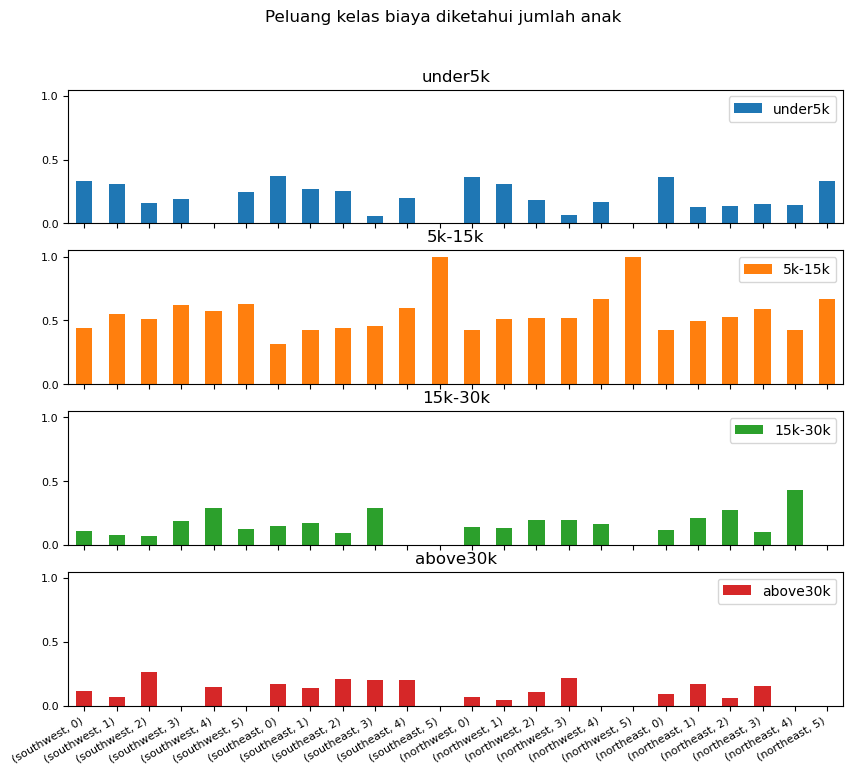

In [75]:
P_chargesclass_given_children_all.plot(kind='bar', figsize=(10,8), rot=30, subplots=True, sharey=True, fontsize=8) 
plt.xlabel('')
plt.xticks(rotation=30, horizontalalignment='right')
plt.suptitle('Peluang kelas biaya diketahui jumlah anak')
plt.show()

In [76]:
# Peluang kelas biaya diketahui gender

P_chargesclassSW_given_sex = pd.crosstab(dfsw['sex'], dfsw['charges_class'], normalize='index') 
P_chargesclassSE_given_sex = pd.crosstab(dfse['sex'], dfse['charges_class'], normalize='index')
P_chargesclassNW_given_sex = pd.crosstab(dfnw['sex'], dfnw['charges_class'], normalize='index') 
P_chargesclassNE_given_sex = pd.crosstab(dfne['sex'], dfne['charges_class'], normalize='index')

P_chargesclass_given_sex_all = (pd.concat([P_chargesclassSW_given_sex, P_chargesclassSE_given_sex, 
P_chargesclassNW_given_sex, P_chargesclassNE_given_sex], keys=['southwest', 'southeast', 'northwest', 'northeast']))
P_chargesclass_given_sex_all

charges_class      under5k    5k-15k   15k-30k  above30k
          sex                                           
southwest female  0.265432  0.567901  0.080247  0.086420
          male    0.276074  0.447853  0.134969  0.141104
southeast female  0.291429  0.422857  0.165714  0.120000
          male    0.285714  0.365079  0.137566  0.211640
northwest female  0.256098  0.506098  0.158537  0.079268
          male    0.279503  0.459627  0.161491  0.099379
northeast female  0.229814  0.503106  0.198758  0.068323
          male    0.257669  0.460123  0.134969  0.147239

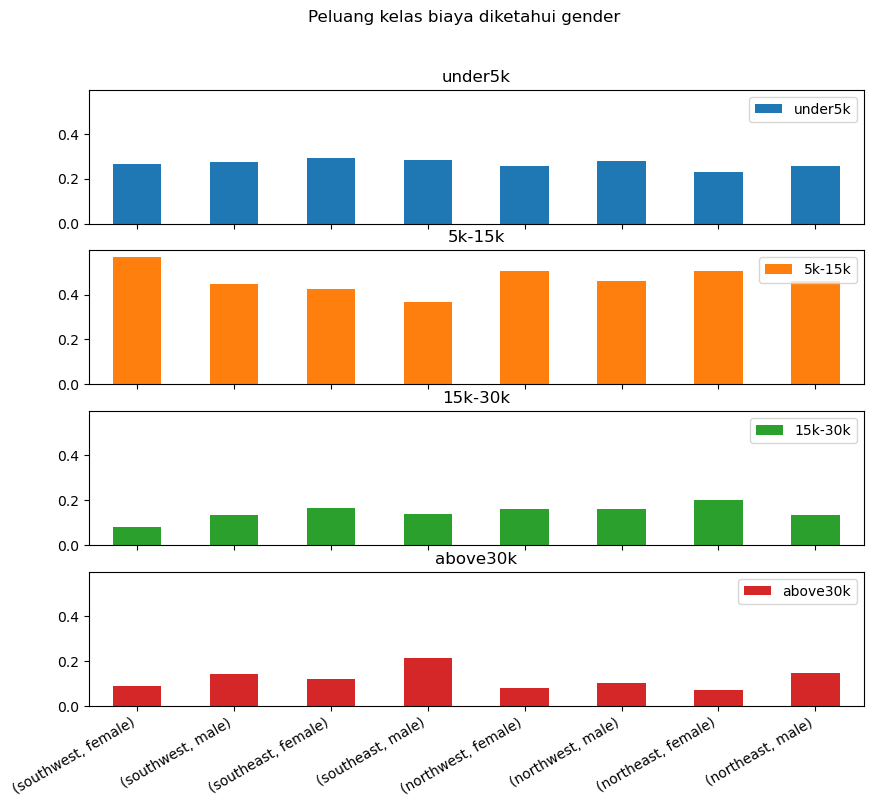

In [77]:
P_chargesclass_given_sex_all.plot(kind='bar', figsize=(10,8), rot=30, subplots=True, sharey=True) 
plt.xlabel('')
plt.xticks(rotation=30, horizontalalignment='right')
plt.suptitle('Peluang kelas biaya diketahui gender')
plt.show()

In [78]:
# Peluang kelas biaya diketahui kondisi merokok

P_chargesclassSW_given_smoker = pd.crosstab(dfsw['smoker'], dfsw['charges_class'], normalize='index') 
P_chargesclassSE_given_smoker = pd.crosstab(dfse['smoker'], dfse['charges_class'], normalize='index')
P_chargesclassNW_given_smoker = pd.crosstab(dfnw['smoker'], dfnw['charges_class'], normalize='index') 
P_chargesclassNE_given_smoker = pd.crosstab(dfne['smoker'], dfne['charges_class'], normalize='index')

P_chargesclass_given_smoker_all = (pd.concat([P_chargesclassSW_given_smoker, P_chargesclassSE_given_smoker, 
P_chargesclassNW_given_smoker, P_chargesclassNE_given_smoker], keys=['southwest', 'southeast', 'northwest', 'northeast']))
P_chargesclass_given_smoker_all

charges_class      under5k    5k-15k   15k-30k  above30k
          smoker                                        
southwest no      0.329588  0.614232  0.048689  0.007491
          yes     0.000000  0.017241  0.379310  0.603448
southeast no      0.384615  0.523810  0.087912  0.003663
          yes     0.000000  0.000000  0.340659  0.659341
northwest no      0.325843  0.584270  0.074906  0.014981
          yes     0.000000  0.017241  0.551724  0.431034
northeast no      0.307393  0.587549  0.093385  0.011673
          yes     0.000000  0.074627  0.447761  0.477612

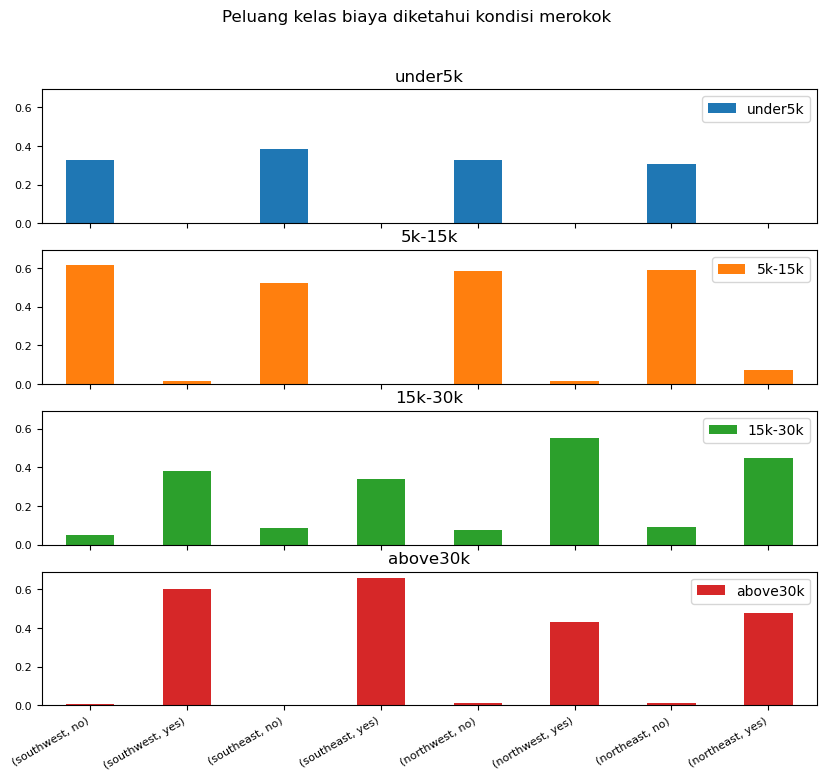

In [79]:
P_chargesclass_given_smoker_all.plot(kind='bar', figsize=(10,8), rot=30, subplots=True, sharey=True, fontsize=8) 
plt.xlabel('')
plt.xticks(rotation=30, horizontalalignment='right')
plt.suptitle('Peluang kelas biaya diketahui kondisi merokok')
plt.show()

In [80]:
# Peluang kelas biaya diketahui kelas BMI

P_chargesclassSW_given_bmiclass = pd.crosstab(dfsw['bmi_class'], dfsw['charges_class'], normalize='index') 
P_chargesclassSE_given_bmiclass = pd.crosstab(dfse['bmi_class'], dfse['charges_class'], normalize='index')
P_chargesclassNW_given_bmiclass = pd.crosstab(dfnw['bmi_class'], dfnw['charges_class'], normalize='index') 
P_chargesclassNE_given_bmiclass = pd.crosstab(dfne['bmi_class'], dfne['charges_class'], normalize='index')

P_chargesclass_given_bmiclass_all = (pd.concat([P_chargesclassSW_given_bmiclass, P_chargesclassSE_given_bmiclass, 
P_chargesclassNW_given_bmiclass, P_chargesclassNE_given_bmiclass], keys=['southwest', 'southeast', 'northwest', 'northeast']))
P_chargesclass_given_bmiclass_all

charges_class           under5k    5k-15k   15k-30k  above30k
          bmi_class                                          
southwest underweight  0.750000  0.000000  0.250000  0.000000
          healthy      0.489796  0.387755  0.122449  0.000000
          overweight   0.227723  0.524752  0.227723  0.019802
          obesity      0.222222  0.543860  0.029240  0.204678
southeast healthy      0.219512  0.341463  0.439024  0.000000
          overweight   0.325000  0.400000  0.250000  0.025000
          obesity      0.288066  0.399177  0.069959  0.242798
northwest underweight  0.428571  0.428571  0.000000  0.142857
          healthy      0.317460  0.476190  0.190476  0.015873
          overweight   0.252336  0.476636  0.252336  0.018692
          obesity      0.250000  0.493243  0.087838  0.168919
northeast underweight  0.300000  0.600000  0.100000  0.000000
          healthy      0.246575  0.479452  0.260274  0.013699
          overweight   0.316327  0.459184  0.183673  0.040816
          obesity      0.188811  0.489510  0.111888  0.209790

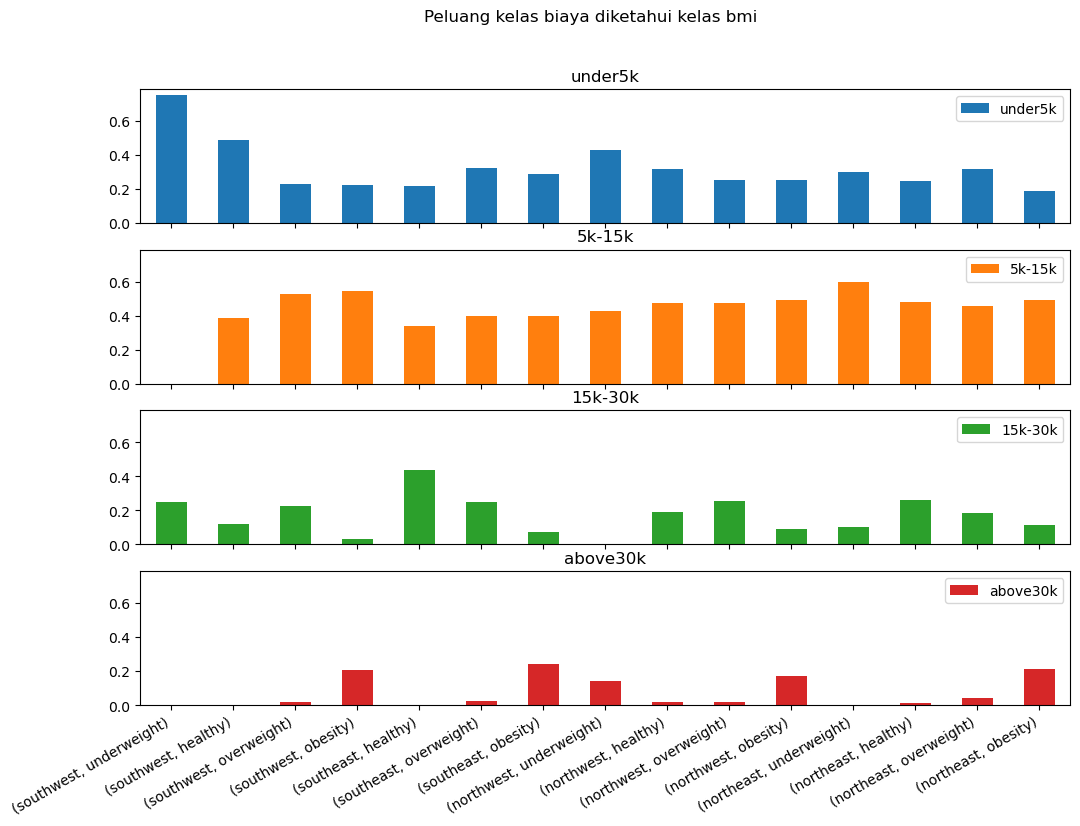

In [81]:
P_chargesclass_given_bmiclass_all.plot(kind='bar', figsize=(12,8), rot=30, subplots=True, sharey=True, sharex=True) 
plt.xlabel('')
plt.xticks(rotation=30, horizontalalignment='right')
plt.suptitle('Peluang kelas biaya diketahui kelas bmi')
plt.show()

In [82]:
# Peluang kelas biaya diketahui kelas usia

P_chargesclassSW_given_ageclass = pd.crosstab(dfsw['age_class'], dfsw['charges_class'], normalize='index') 
P_chargesclassSE_given_ageclass = pd.crosstab(dfse['age_class'], dfse['charges_class'], normalize='index')
P_chargesclassNW_given_ageclass = pd.crosstab(dfnw['age_class'], dfnw['charges_class'], normalize='index') 
P_chargesclassNE_given_ageclass = pd.crosstab(dfne['age_class'], dfne['charges_class'], normalize='index')

P_chargesclass_given_ageclass_all = (pd.concat([P_chargesclassSW_given_ageclass, P_chargesclassSE_given_ageclass, 
P_chargesclassNW_given_ageclass, P_chargesclassNE_given_ageclass], keys=['southwest', 'southeast', 'northwest', 'northeast']))
P_chargesclass_given_ageclass_all

charges_class         under5k    5k-15k   15k-30k  above30k
          age_class                                        
southwest ~20        0.717949  0.025641  0.153846  0.102564
          20-40      0.465116  0.279070  0.108527  0.147287
          40-60      0.000000  0.837037  0.096296  0.066667
          60~        0.000000  0.681818  0.090909  0.227273
southeast ~20        0.708333  0.062500  0.083333  0.145833
          20-40      0.493056  0.222222  0.145833  0.138889
          40-60      0.000000  0.653061  0.156463  0.190476
          60~        0.000000  0.480000  0.280000  0.240000
northwest ~20        0.658537  0.024390  0.195122  0.121951
          20-40      0.458015  0.351145  0.137405  0.053435
          40-60      0.000000  0.746154  0.138462  0.115385
          60~        0.000000  0.565217  0.347826  0.086957
northeast ~20        0.684211  0.157895  0.078947  0.078947
          20-40      0.404580  0.290076  0.206107  0.099237
          40-60      0.000000  0.731343  0.149254  0.119403
          60~        0.000000  0.666667  0.190476  0.142857

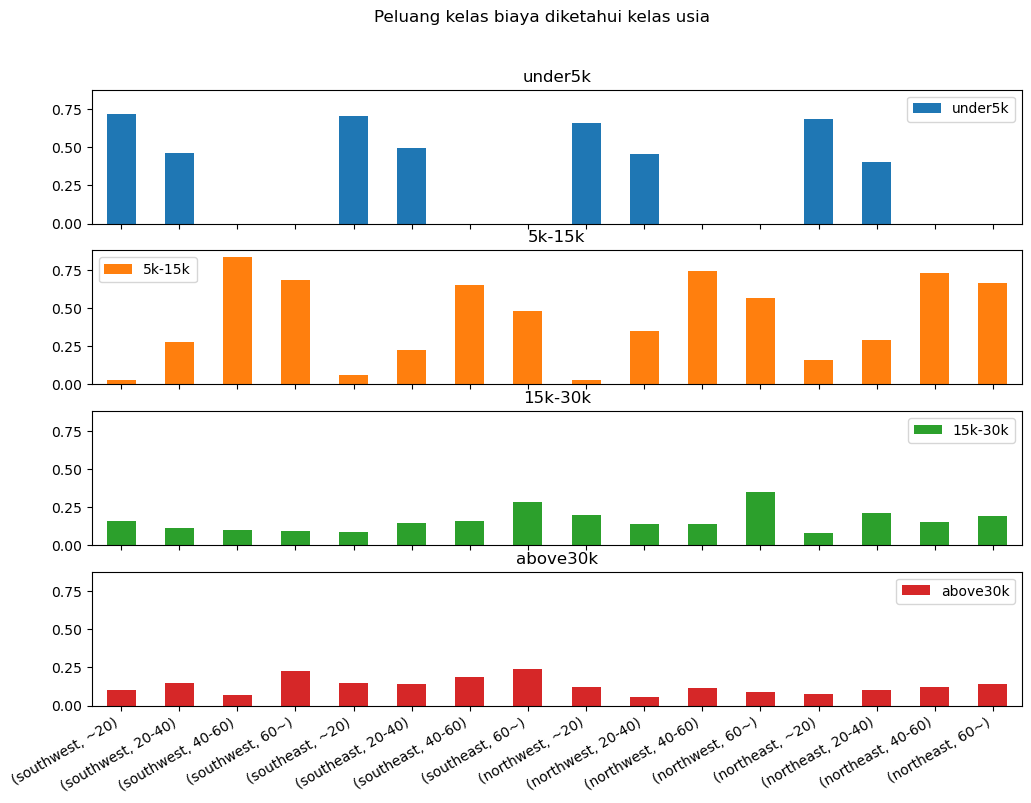

In [83]:
P_chargesclass_given_ageclass_all.plot(kind='bar', figsize=(12,8), rot=30, subplots=True, sharey=True) 
plt.xlabel('')
plt.xticks(rotation=30, horizontalalignment='right')
plt.suptitle('Peluang kelas biaya diketahui kelas usia')
plt.show()

In [84]:
df.groupby(['smoker', 'bmi_class']).charges_class.value_counts(normalize=True)


smoker  bmi_class            
no      underweight  under5k     0.562500
                     5k-15k      0.437500
                     15k-30k     0.000000
                     above30k    0.000000
        healthy      5k-15k      0.528409
                     under5k     0.403409
                     15k-30k     0.062500
                     above30k    0.005682
        overweight   5k-15k      0.581994
                     under5k     0.344051
                     15k-30k     0.061093
                     above30k    0.012862
        obesity      5k-15k      0.593583
                     under5k     0.306595
                     15k-30k     0.090909
                     above30k    0.008913
yes     underweight  5k-15k      0.400000
                     15k-30k     0.400000
                     above30k    0.200000
                     under5k     0.000000
        healthy      15k-30k     0.880000
                     5k-15k      0.100000
                     above30k    0.020000
    

Mana yang lebih mungkin terjadi
* Seseorang perokok dengan BMI diatas 25 (overweight) mendapatkan tagihan kesehatan
di atas 15k -> 0.92 + 0.08 = 1
* Seseorang non perokok dengan BMI diatas 25 (overweight) mendapatkan tagihan kesehatan
di atas 15k -> 0.06 + 0.01 = 0.07

### Variabel kontinu pada BMI

<AxesSubplot:>

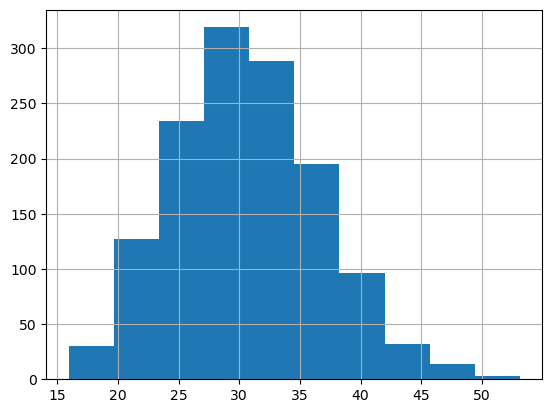

In [85]:
df.bmi.hist()

Histogram BMI terlihat terdistribusi normal.

Distribusi Normal memiliki 2 parameter yaitu rata-rata ($\mu$) dan variance ($\sigma^2$) dimana memiliki fungsi PDF sebagai berikut.

$$
\mathcal{N}(x ; \mu,\,\sigma^{2}) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}
$$

In [87]:
# Mencari mean dan varians BMI

from scipy.stats import norm

bmi_mean = round(df.bmi.mean(),2)
bmi_var = round(df.bmi.var(),2)

print(f'BMI mean: {bmi_mean}') 
print(f'BMI varians: {bmi_var}')

BMI mean: 30.66
BMI varians: 37.19


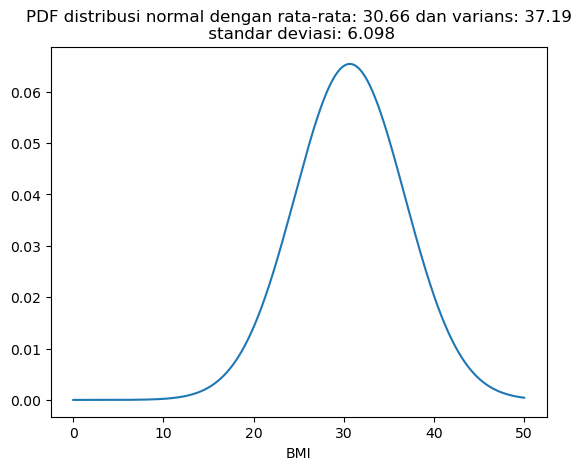

In [88]:

# Plot grafik distribusi normal dari BMI

def pdf_normal(x, mu, var):
    return (1 / np.sqrt(2 * np.pi * var)) *\
        np.exp(-(1 / (2 * var)) * (x - mu) ** 2) # simulasi distribusi normal

x_axis = np.arange(0, 50, 0.01)
y_axis = pdf_normal(x_axis, bmi_mean, bmi_var)
plt.plot(x_axis, y_axis)
plt.xlabel('BMI')
plt.title('PDF distribusi normal dengan rata-rata: '+str(bmi_mean)+' dan varians: '+str(bmi_var)+'\n standar deviasi: ' + str(np.round(np.sqrt(bmi_var),3)))
plt.show()

In [89]:
# Peluang pengguna dengan BMI kurang dari x

x = 35
std = np.sqrt(bmi_var)
P_bmi_below_x = norm.cdf(x, bmi_mean, std)
print(f'Peluang pengguna dengan BMI kurang dari {x}: {P_bmi_below_x:.2f}')

Peluang pengguna dengan BMI kurang dari 35: 0.76


In [ ]:
# Peluang pengguna dengan BMI lebih dari x

x = 35
P_bmi_above_x = 1-norm.cdf(x, bmi_mean, std)
print(f'Peluang pengguna dengan BMI di atas {x}: {P_bmi_above_x:.2f}')

Peluang pengguna dengan BMI di atas 35: 0.24


In [ ]:
# Peluang kurang dari 30
x1 = 30
P1 = norm.cdf(x1, bmi_mean, std)

# Peluang kurang dari 35
x2 = 35
P2 = norm.cdf(x2, bmi_mean, std)

# Mean
P_bmi_between = P2-P1
print(f'Peluang pengguna dengan BMI diantara {x1} hingga {x2} adalah: {P_bmi_between:.2f}')

Peluang pengguna dengan BMI diantara 30 hingga 35 adalah: 0.30


In [ ]:
# Ditanyakan x

P = 0.8
x = norm.ppf(P, bmi_mean, std)
print('Jika diketahui peluangnya sekitar 80% maka BMI pengguna kurang dari',np.round(x,2))

Jika diketahui peluangnya sekitar 80% maka BMI pengguna kurang dari 35.79


# Uji Statistik

Uji hipotesis adalah metode pengambilan keputusan yang didasarkan dari analisis data, baik dari percobaan yang terkontrol, maupun dari observasi (tidak terkontrol). Dalam statistik sebuah hasil bisa dikatakan signifikan secara statistik jika kejadian tersebut hampir tidak mungkin disebabkan oleh faktor yang kebetulan, sesuai dengan batas probabilitas yang sudah ditentukan sebelumnya.

-Pacmann-

## Apakah rata-rata biaya perokok dan non perokok berbeda sangat besar

H<sub>0</sub> : mu<sub>smoker</sub> = mu<sub>nonsmoker</sub>

H<sub>1</sub> : mu<sub>smoker</sub> != mu<sub>nonsmoker</sub>

In [ ]:
# Menentukan nilai alpha (signifikansi)

alpha = 0.05

# Membandingkan variansi charges perokok dan non perokok

smokers = df[df['smoker_norm'] == 1] 
nonsmokers = df[df['smoker_norm'] == 0] 

smokers_charges = smokers['charges']
nonsmokers_charges = nonsmokers['charges']

smokers_charges_var = np.var(smokers_charges)
nonsmokers_charges_var = np.var(nonsmokers_charges)

print('Variansi biaya pengguna perokok ', smokers_charges_var)
print('Variansi biaya pengguna non perokok ', nonsmokers_charges_var)


Variansi biaya pengguna perokok  132721153.13625304
Variansi biaya pengguna non perokok  35891656.00316425


In [ ]:
# Uji statatistik menggunakan t test

from scipy.stats import ttest_ind

t_stats, p_value = ttest_ind(smokers_charges, nonsmokers_charges, equal_var=False, alternative='two-sided')
print(f't_stats: {t_stats}')
print(f'p_value: {p_value}')

t_stats: 32.751887766341824
p_value: 5.88946444671698e-103


In [ ]:
p_value > alpha

False

**Karena p_value lebih besar daripada alpha bernilai False, maka tolak H<sub>0</sub>. Dalam artian: Rata-rata biaya pengguna perokok tidak sama dengan rata-rata biaya pengguna non perokok, sehingga dapat dikatakan bahwa biaya pengguna perokok memang lebih besar daripada pengguna non perokok.**

## Apakah proporsi pria perokok lebih besar daripada wanita perokok

H<sub>0</sub> : p<sub>male_smoker</sub> = p<sub>female_smoker</sub>

H<sub>1</sub> : p<sub>male_smoker</sub> != p<sub>female_smoker</sub>

In [ ]:
df.groupby(['smoker']).sex.value_counts()


smoker  sex   
no      female    547
        male      517
yes     male      159
        female    115
Name: sex, dtype: int64

In [ ]:
# Proporsi pria perokok dan wanita perokok

n_males = 159+517 # total pria
n_females = 115+547 # total wanita
male_smokers = 159 # jumlah pria perokok 
female_smokers = 115 # jumlah wanita perokok


Karena pada kali ini peluang yang akan dihitung, maka digunakan z test.

In [ ]:
# Menentukan nilai alpha (signifikansi)

alpha = 0.05

# Uji statistik menggunakan z test

from statsmodels.stats.proportion import proportions_ztest

z_stat, pval = proportions_ztest([female_smokers, male_smokers], [n_females, n_males], alternative='two-sided')
print(f'z statistic: {z_stat}')
print(f'p_value: {pval}')

z statistic: -2.7867402154855503
p_value: 0.005324114164320532


In [ ]:
# Nilai Critical Value 

import scipy.stats as stats
z_crit = stats.norm.ppf(1-0.05)
print(f'Nilai z ciritcal: {z_crit}')

Nilai z ciritcal: 1.6448536269514722


Text(0.5, 1.0, 'z-statistic = -2.78')

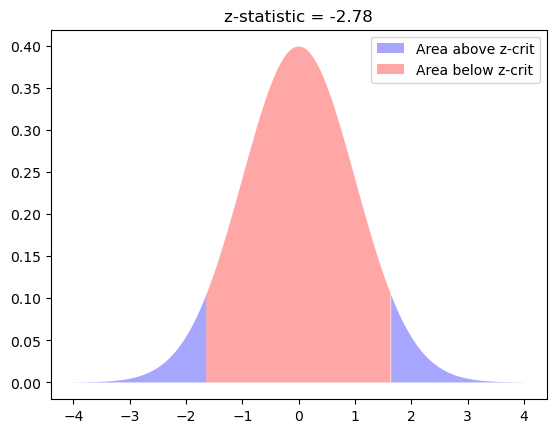

In [ ]:
# Plot untuk mengethaui area z critical

plt.fill_between(x=np.arange(1.64,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1.64,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-crit')

plt.fill_between(x=np.arange(-1.64,-4,-0.01), 
                 y1= stats.norm.pdf(np.arange(-1.64,-4,-0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 #label= 'Area above z-crit'
                 )

plt.fill_between(x=np.arange(-1.64,1.64,0.01),
                 y1= stats.norm.pdf(np.arange(-1.64,1.64,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-crit')
plt.legend()
plt.title ('z-statistic = -2.78')


Bila dilakukan uji dua pihak terhadap nilai z, didapat nilai z critical adalah +-1.64 dan nilai z statistik -2.78. Sehingga nilai z statistik berada di area penolakan null hipotesis. Dengan kata lain, menolak H<sub>0</sub>.

Apabila dilakukan pembandingan nilai p_value dan alpha (0.05), di mana p_value = 0.0053 sehingga bernilai lebih kecil dari alpha.

In [ ]:
p_value < - alpha

False

**Nilai p_value lebih kecil daripada alpha bernilai True, maka H<sub>0</sub> tertolak. Dalam artian: proporsi pria perokok tidak sama dengan proporsi wanita perokok, sehingga dapat dikatakan bahwa proporsi pria perokok memang lebih banyak daripada wanita perokok.**

In [ ]:
z_stat < -(z_crit/2)

True

Jika yang dibandingkan adalah nilai z nya, maka hasilnya akan sama, yaitu tolak H<sub>0</sub>. Karena ini adalah uji dua pihak, dan nilai z statistiknya kurang dari nilai -(z kritis/2) bernilai True, maka tolak H<sub>0</sub>.